# Dataframe Setup

In [ ]:
'''
Setup:
'''
!pip install --upgrade scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import re
import statistics 
import pdb
import time

from itertools import combinations
import scipy.stats as stats
from scipy.stats.mstats import winsorize

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.svm import SVR

import requests
from io import StringIO

%matplotlib inline
#pd.options.display.float_format = '{:.3f}'.format # Display preferences
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

orig_url='https://drive.google.com/file/d/1x6koyYMEzfJJueUcHLyTG_x93Awyk3IH/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
fuel_df = pd.read_csv(csv_raw)

     |████████████████████████████████| 25.9MB 166kB/s 
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
fuel_df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [ ]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

# Feature Selection Functions

In [ ]:
def sort_list(sub_li): 
  return (sorted(sub_li, key = lambda x: x[1]))  

def z_to_raw(z, std, average):
  raw_score = int(average + (std)*(z))
  return raw_score  

**create_n_groups** - used to transform discrete variables into categorical variables using the z-score information.

In [ ]:
def create_n_groups(feature_name, data_list, num_groups):

  min_val = min(data_list[2])-.1
  max_val = max(data_list[2])+.1
  full_range = max_val - min_val

  thresholds = []
  result_list = []
  group_len = full_range / num_groups

  for i in range(num_groups-1):
    zsco = min_val + ((i+1)*group_len)
    thresholds.append(zsco)
    #thresholds.append(data_list[0] + (zsco*data_list[1]))
  thresholds.insert(0, min_val)
  thresholds.append(max_val)
  #thresholds.insert(0, data_list[0] + (min_val*data_list[1]))
  result_list.append([feature_name, thresholds])
 
  return result_list

**perform_anova:** - used for categorical feature selection

In [ ]:
def perform_anova(var_name, tar_name, data):
  base_input = tar_name + ' ~ ' + var_name

  model = ols(base_input, data = data).fit()
  table = sm.stats.anova_lm(model, typ=2)

  x = table.loc[var_name, 'F']
  y = table.loc[var_name, 'PR(>F)']

  return x, y

**analyze_categorical:** - used for categorical feature selection.

In [ ]:
#write a function that returns the comparison matrix and the % of significant groups by mean for categorical features
def analyze_categorical(feature_name, target_name, data_frame):
  cat_list = data_frame[feature_name].unique()

  answer_df = pd.DataFrame(index=cat_list, columns=cat_list)

  if (len(cat_list) < 2):
    answer = 0
    return answer_df, answer

  comparison_score = 0
  for i in range(0, len(cat_list)):
    for j in range(i+1, len(cat_list)): 
      if(stats.ttest_ind(
        data_frame[data_frame[feature_name]==cat_list[i]][target_name], 
        data_frame[data_frame[feature_name]==cat_list[j]][target_name], nan_policy='omit')[1] < .05):
        answer_df.at[cat_list[i], cat_list[j]] = True
        comparison_score = comparison_score + 1
      else:
        answer_df.at[cat_list[i], cat_list[j]] = '--'

  #calculate the % of comparisons that display a significant difference
  total_comparisons = ((len(cat_list) ** 2) / 2) - (len(cat_list) / 2)
  answer = comparison_score / total_comparisons
  
  return answer_df, answer

**perform_feature_selection:** - removes extraneous variables from the model and performs data winsorization.

In [ ]:
# assumes null values have already been handled and target is a continuous variable
def perform_feature_selection(target, data, cont_thresh, multi_thresh, cat_thresh, winz, *auto_delete):

  for col in auto_delete:
    data = data.drop(col, axis = 1) 

  #fill in the null values for the continuous features with 0's
  con_full_df = data.select_dtypes(include=['float', 'int']).copy()

  #move the target variable to the begginning of the data frame
  raw_names = con_full_df.columns.values.tolist()
  column_no = raw_names.index(target)
  indices = list(range(len(raw_names)))
  indices.remove(column_no)
  indices.insert(0, column_no)
  con_full_df = con_full_df[con_full_df.columns[indices]]

  #create a winsorized version of the data frame (continuous variables)
  winz_con_full_df = pd.DataFrame()
  dataframe_columns = con_full_df.columns.tolist()
  for feature in dataframe_columns:
    winz_con_full_df[feature] = winsorize(con_full_df[feature], (0.10, 0.10), nan_policy='omit')

  #create a sorted list of all of the continuous variables that have over 30% correlation with the saleprice
  corr_matrix_df = winz_con_full_df.corr()

  #create a list that has the target variable along with all of the relevant continuous features
  index_list = corr_matrix_df[corr_matrix_df[target].abs() > cont_thresh][target].index.tolist()

  #construct a new data frame with all of the continuous variables that are most correlated with the saleprice
  winz_con_corr_df = winz_con_full_df.filter(index_list, axis=1)

  # Create a correlation matrix without the target variable in order to address multi-collinearity
  drop_target_df = winz_con_corr_df.drop([target], axis=1)
  abs_corr_matrix_df = drop_target_df.corr().abs()

  # Select upper triangle of correlation matrix
  upper = abs_corr_matrix_df.where(np.triu(np.ones(abs_corr_matrix_df.shape), k=1).astype(np.bool))

  # Collect index of feature columns that remain after the multicollinearity refinement
  to_drop = [column for column in upper.columns if any(upper[column] > multi_thresh)]

  # Drop features that are too heavily correlated with one another
  con_features_df = winz_con_corr_df.drop(winz_con_corr_df[to_drop], axis=1)  

  # Create a data frame that contains the categorical variables
  cat_full_df = data.select_dtypes(include=['object', 'category', 'bool']).copy()

  # Add in the saleprice variable to the front of the data frame
  cat_full_df[target] = winz_con_full_df[target]
  new_order = list(range(0, len(cat_full_df.columns)-1))
  new_order.insert(0, len(cat_full_df.columns)-1)
  cat_full_df = cat_full_df[cat_full_df.columns[new_order]]


  ####-----------------create an anova categorical feature selection option----------------###


  #create a dictionary with all of the comparison matrices and their t-test scores
  column_list = cat_full_df.columns.tolist()
  column_list.pop(0)

  categorical_scores = []
  categorical_frames = []
  for var in column_list:
    comparison_df, comparison_value = analyze_categorical(var, target, cat_full_df)
    categorical_scores.append(comparison_value)
    categorical_frames.append(comparison_df)

  variable_array = list(zip(categorical_frames, categorical_scores))
  comparison_dictionary = dict(zip(column_list, variable_array))

  #for var in column_list:
    #print('{} comparison score: {}%'.format(var, round((comparison_dictionary[var][1] * 100), 2)))

  #create a list of all of the valid categorical features
  valid_categorical = []
  for feature in column_list:
    if comparison_dictionary[feature][1] >= cat_thresh:
      valid_categorical.append(feature)  

  #merge the selected categorical and continuous features into a single data frame to build the linear regression model
  valid_categorical_df = cat_full_df.filter(valid_categorical, axis=1)
  valid_categorical_df.insert(loc=0, column = target, value = winz_con_full_df[target])
  filtered_data_df = pd.merge(con_features_df, valid_categorical_df, right_index=True, left_index=True) #filtered_data_df
  target_enc_y = target + '_y'
  target_enc_x = target + '_x'
  del filtered_data_df[target_enc_y]
  filtered_data_df.rename(columns = {target_enc_x: target}, inplace = True) 

  #save a merged dataframe with the final categorical and continuous before the encoding
  pre_filtered_data_df = filtered_data_df.copy()

  #Encode the filtered data frame and delete the unencoded columns
  for feature in valid_categorical:
    filtered_data_df = pd.merge(filtered_data_df, pd.get_dummies(filtered_data_df[feature], drop_first=True), 
                                    right_index=True, left_index=True)
    del filtered_data_df[feature]

  #pdb.set_trace()

  return pre_filtered_data_df, filtered_data_df, upper, comparison_dictionary  #unencoded and encoded dataframes

# >>> Set Feature Selection Conditions

**Dashboard:**

In [ ]:
tar_var = 'Annual Consumption in Barrels (FT1)'  # input the name of the continuous target variable  
auto_remove = ['Vehicle ID', 'Engine Descriptor', 'Model']  # input the name of any columns to auto remove before feature selection

con_threshold = .65 # perform preliminary feature selection for variables that are correlated above this value
con_multi_threshold = .30 # eliminate the least correlated variable when there is a multicollinear relationship above this threshold 
cat_threshold = .65 # select for categorical features with a percentage of significant mean value differences above this threshold 

# Feature Engineering and Data Cleaning

Handle null values, transform discrete variables, and transform duplicate sub category names.

In [ ]:
tic = time.perf_counter()

# Create a data frame that contains the continuous variables and handle the null values
non_object_df = fuel_df.select_dtypes(exclude=['object']).copy()
non_object_df.dropna(inplace=True)

# Create a data frame that contains the categorical variables and handle the null values
cat_df = fuel_df.select_dtypes(include=['object', 'bool']).copy()
cat_bool_names = fuel_df.select_dtypes(include=['bool']).columns.values.tolist()
for bool_col in cat_bool_names:
  cat_df[bool_col] = cat_df[bool_col].astype(str)
cat_df.fillna('NA', inplace=True)

con_float_df = fuel_df.select_dtypes(include=['float']).copy()
float_names = con_float_df.columns.values.tolist()
# create a list of float values that have less than 40 unique values
discrete_floats = []
for i in range(len(float_names)):
  item_len = len(sorted(con_float_df[float_names[i]].unique()))
  if (item_len < 40):
    discrete_floats.append(float_names[i])

# Transform discrete variables into categorical features
discrete_df = non_object_df.select_dtypes(include=['int']).copy()
for col_name in discrete_floats:
  discrete_df[col_name] = con_float_df[col_name]
  del con_float_df[col_name]

# Add the target variable to the continuous list if it is a discrete value
if (tar_var in discrete_df.columns):
  con_float_df[tar_var] = discrete_df[tar_var]
  del discrete_df[tar_var]

discrete_col_lengths = []
for col in discrete_df.columns:
  discrete_col_lengths.append([col, len(discrete_df[col].unique())])
discrete_var_depth = sort_list(discrete_col_lengths)

# Remove any discrete variables that only have 1 unique value o/w capture z-score values
z_scores = {}
delete_features = []
for discrete_info in discrete_var_depth:
  if (discrete_info[1] ==  1):
    delete_features.append(discrete_info[0])
    continue
  col_name = discrete_info[0]
  stdev = statistics.pstdev(discrete_df[col_name]) 
  mean = sum(discrete_df[col_name]) / len(discrete_df[col_name])
  z_scores.update({col_name : [mean, statistics.pstdev(discrete_df[col_name]), stats.zscore(discrete_df[col_name])]})

# Determine how to break the discrete values up into 'evenly represented' groups according to the z-scores
z_score_thresholds = []
for feature in z_scores.keys():
  num_groups = 2
  if (len(set(z_scores[feature][2])) > 10):
    num_groups = 3
  z_score_thresholds.append(create_n_groups(str(feature), z_scores[feature], num_groups))

# Remove any features that only contain 1 unique z-score in their set
disc_cat_thresholds = []
for i in range(len(z_score_thresholds)):
  if (len(set(z_score_thresholds[i][0][1])) == 1):
    delete_features.append(z_score_thresholds[i][0][0])
  else:
    disc_cat_thresholds.append(z_score_thresholds[i])

# Replace the columns in the dataframe with the z score values
for key in z_scores.keys():
  del discrete_df[str(key)]
  discrete_df[str(key)] = z_scores[str(key)][2]

for i in range(len(disc_cat_thresholds)):
  category = disc_cat_thresholds[i][0][0]
  if (len(disc_cat_thresholds[i][0][1]) == 4):
    new_categories = pd.cut(discrete_df[category], bins = disc_cat_thresholds[i][0][1], labels = ['Low', 'Med', 'High'])   
    del discrete_df[category]
    discrete_df.insert(0, category, new_categories)
  else:
    new_categories = pd.cut(discrete_df[category], bins = disc_cat_thresholds[i][0][1], labels = ['Low', 'High'])   
    del discrete_df[category]
    discrete_df.insert(0, category, new_categories)    
         
cat_combined_df = pd.merge(discrete_df, cat_df, right_index=True, left_index=True)
cat_combined_df = cat_combined_df.drop(columns=delete_features)

# Create a dictionary that contains all of the subcategory names
cat_feat_dict = {}
[cat_feat_dict.update({cat_combined_df.columns[i] : cat_combined_df[cat_combined_df.columns[i]].unique()}) for i in range(len(cat_combined_df.columns))]

# Create a list of all of the subcategory names that are duplicated in other categories
change_list = []
for key in cat_feat_dict.keys():
  for i in range(len(cat_feat_dict[key])):
    for comp_key in cat_feat_dict.keys():
      if (key == comp_key):
        continue
      if (cat_feat_dict[key][i] in cat_feat_dict[comp_key]):
        change_list.append([cat_feat_dict[key][i], str(key)])

rename_vars = [] 
[rename_vars.append(var_info) for var_info in change_list if var_info not in rename_vars] 

# Change the names of all of the duplicated subcategories in the data frame
for i in range(len(rename_vars)):
  category = rename_vars[i][1]
  value = rename_vars[i][0]
  new_value = value + '-' + category
  new_col = cat_combined_df[category].replace(value, new_value)
  cat_combined_df.drop(columns=[category])
  cat_combined_df[category] = new_col
  
# Merge the two data frames back together
full_data_frame = pd.merge(con_float_df, cat_combined_df, right_index=True, left_index=True)

toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)
print('\n')
print("The Feature Engineering step completed in {} minutes and {} seconds".format(mins, secs))  



The Feature Engineering step completed in 0 minutes and 10 seconds


# Feature Selection and Outlier Removal

Apply information from the user dashboard and perform the feature selection.

In [ ]:
tic = time.perf_counter()
# perform the feature selection: target, encoded data, continuous thresh, multi-collinear thresh, categorical thresh, winsorize mode, manual selection
pre_filtered_model_df, filtered_model_df, corr_mat, comp_dict = perform_feature_selection(tar_var, full_data_frame, con_threshold
                                                                                 , con_multi_threshold, cat_threshold, True, *auto_remove)
toc = time.perf_counter()


seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)
print('\n')
print("Model Feature Selection completed in {} minutes and {} seconds".format(mins, secs))  

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/mstats_basic.py:1070: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!




Model Feature Selection completed in 6 minutes and 40 seconds


In [ ]:
# Create a data frame that contains the selected and filtered continuous features with the target variable as the first column
con_pre_filtered_df = pre_filtered_model_df.select_dtypes(include=['float', 'int']).copy()

# Create a data frame that contains the selected and filtered categorical features with the target variable as the first column
cat_pre_filtered_df = pre_filtered_model_df.select_dtypes(include=['object', 'category', 'bool']).copy()
cat_pre_filtered_df[tar_var] = pre_filtered_model_df[tar_var]
order_list = list(range(0, len(cat_pre_filtered_df.columns)-1))
order_list.insert(0, len(cat_pre_filtered_df.columns)-1)
cat_pre_filtered_df = cat_pre_filtered_df[cat_pre_filtered_df.columns[order_list]]

#Data Visualizations

The target variable is nearly normal and has the right skew.

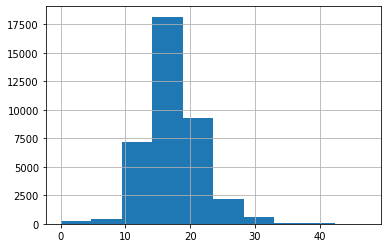

In [ ]:
fuel_df[tar_var].hist()  

The continuous feature in the model appears to be well correlated with the target variable.

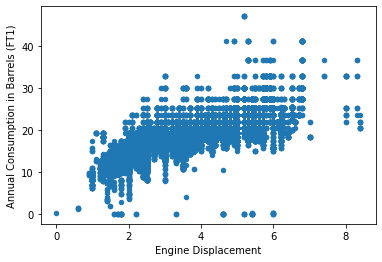

In [ ]:
con_float_df.plot.scatter(x = 'Engine Displacement', y = tar_var)

In [ ]:
sel_cols = pre_filtered_model_df.select_dtypes(exclude = ['object', 'bool']).columns.values.tolist()
sel_cols.remove(tar_var)
selected_raw = fuel_df.filter(sel_cols, axis=1)
max_vals = selected_raw.max(axis=0).sort_values()
min_vals = selected_raw.min(axis=0).sort_values()
range_vals = max_vals.subtract(min_vals, fill_value=0)
boxplot_info = pd.concat([max_vals, min_vals, range_vals], axis=1)
boxplot_info.rename(columns = {0:'Max', 1:'Min', 2:'Range'}, inplace = True) 
boxplot_info

,Max,Min,Range
Highway Utility Factor,0.877,0.0,0.877
Combined Utility Factor,0.888,0.0,0.888
GHG Score (Alt Fuel),8.000,-1.0,9.000
Engine Displacement,8.400,0.0,8.400
GHG Score,10.000,-1.0,11.000
Fuel Economy Score,10.000,-1.0,11.000
Hatchback Luggage Volume,49.000,0.0,49.000
4D Luggage Volume,55.000,0.0,55.000
Composite Highway MPG,81.000,0.0,81.000
Highway MPG (FT2),121.000,0.0,121.000


The categorical features included in the model have outlier values which is why the data used in the regression analysis has been winsorized.

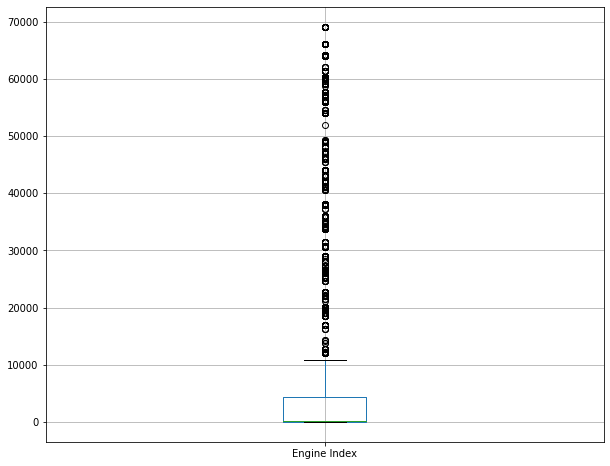

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
boxplot1 = fuel_df.boxplot(column = ['Engine Index'])

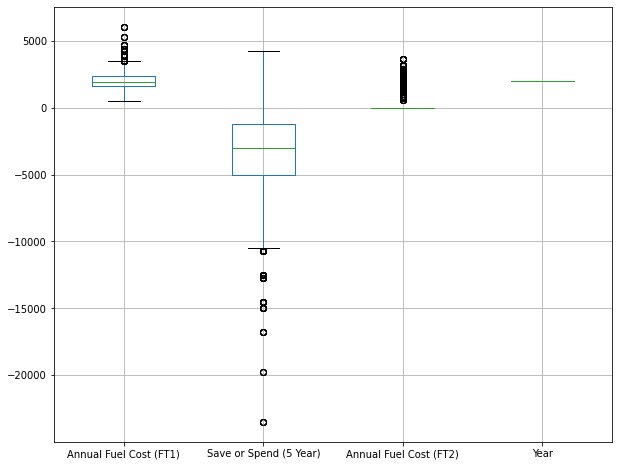

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
range2 = ['Annual Fuel Cost (FT1)', 'Save or Spend (5 Year)', 'Annual Fuel Cost (FT2)', 'Year']
boxplot2 = fuel_df.boxplot(column = range2)

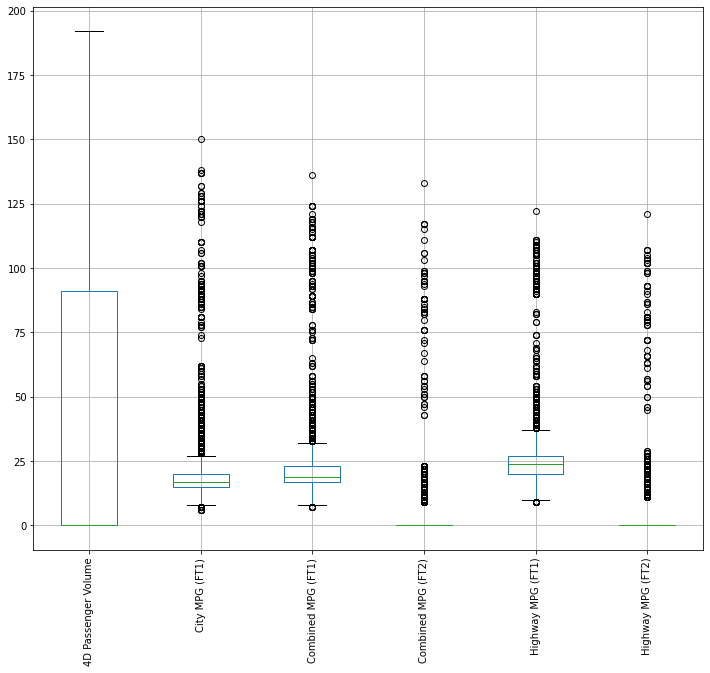

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 10)
range3 = ['4D Passenger Volume', 'City MPG (FT1)', 'Combined MPG (FT1)', 'Combined MPG (FT2)'
          , 'Highway MPG (FT1)', 'Highway MPG (FT2)']
boxplot3 = fuel_df.boxplot(column = range3)
boxplot3.set_xticklabels(boxplot3.get_xticklabels(), rotation=90)

boxplot3

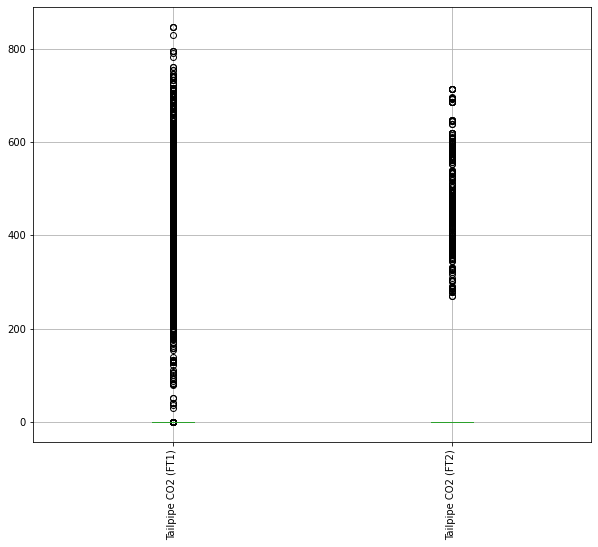

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
range4 = ['Tailpipe CO2 (FT1)', 'Tailpipe CO2 (FT2)']
boxplot4 = fuel_df.boxplot(column = range4)
boxplot4.set_xticklabels(boxplot4.get_xticklabels(), rotation=90)

boxplot4

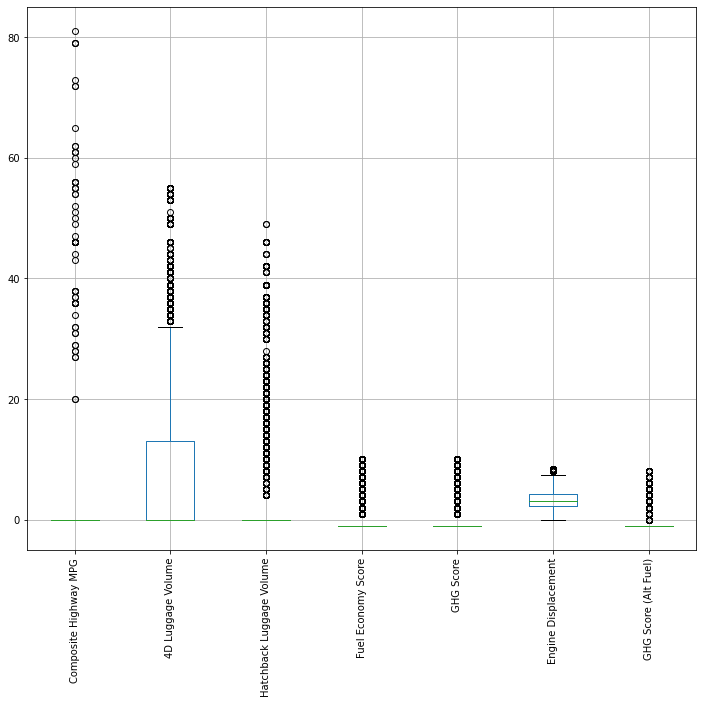

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 10)
range5 = ['Composite Highway MPG', '4D Luggage Volume', 'Hatchback Luggage Volume', 'Fuel Economy Score'
          , 'GHG Score', 'Engine Displacement', 'GHG Score (Alt Fuel)']
boxplot5 = fuel_df.boxplot(column = range5)
boxplot5.set_xticklabels(boxplot5.get_xticklabels(), rotation=90)

boxplot5

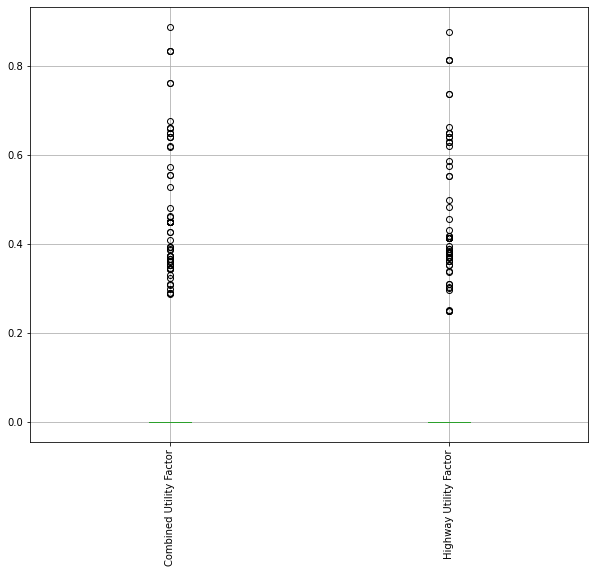

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
range6 = ['Combined Utility Factor', 'Highway Utility Factor']
boxplot6 = fuel_df.boxplot(column = range6)
boxplot6.set_xticklabels(boxplot6.get_xticklabels(), rotation=90)

boxplot6

# OLS Linear Regression Functions

**create_ordered_dict:** - keeps track of the coefficient order.

In [ ]:
def create_ordered_dict(target_variable, continuous_target, data_frame):

  cont_columns = data_frame.select_dtypes(include=['float', 'int']).columns.values.tolist()
  cat_object_features = data_frame.select_dtypes(include=['object', 'bool']).columns.values.tolist()
  cat_cat_features = data_frame.select_dtypes(include=['category']).columns.values.tolist()
  cat_columns = cat_cat_features + cat_object_features

  o_feat_dict = {}
  cont_dict = {'continuous' : cont_columns}
  cat_dict = {'categorical' : cat_columns}
  target_dict = {'target' : target_variable}

  o_feat_dict.update(cat_dict)
  o_feat_dict.update(cont_dict)
  o_feat_dict.update(target_dict)

  return o_feat_dict

**create_result_dictionary:** - creates an OLS summary result dictionary to track categorical feature and subfeature relationships.

In [ ]:
def create_result_dictionary(categorical_features, cat_df, ols_results):

  cat_cat_features = cat_df.select_dtypes(include=['category']).columns.values.tolist()
  cat_object_features = cat_df.select_dtypes(include=['object', 'bool']).columns.values.tolist()
  categorical_features = cat_cat_features + cat_object_features

  #create a list of all of the values for each category
  cat_values = []
  for val in categorical_features:
    cat_values.append(cat_df[val].unique().tolist())
   
  #create a list of tuples with the category name and values
  cat_array = list(zip(categorical_features, cat_values))

  #sort the list of values in the category list to match the encoder output
  sorted_values = []
  for i in range(len(cat_array)):
    if (cat_array[i][0] in cat_cat_features):
      sorted_values.append(cat_array[i][1])
    else:
      sorted_values.append(sorted(cat_array[i][1]))

  #create the sorted category list using list comprehension and a generator function to convert zip tuples
  list_cat_array = [list(x) for x in zip(categorical_features, sorted_values)]

  #create a dictionary with the sorted category values
  dict_cat_array = {}
  for item in list_cat_array:
    dict_cat_array.update({item[0] : item[1]})

  #calculate the number of categorical value results in the list
  values_sum = 0
  for item in list_cat_array:
    values_sum += len(item[1])
  values_sum -= len(list_cat_array)

  #create a 2D list with all of the result coefficients and the p-values
  pair_list = [list(x) for x in zip(ols_results.params, ols_results.pvalues)] 
  result_list = [list(x) for x in zip(ols_results.params.index, pair_list)]

  #remove the identifier artifacts from the category codes 
  sep = '_'
  code_list = []
  for i in range(len(result_list)):
    rest = result_list[i][0].split(sep, 1)[0]
    code_list.append(rest) 

  #overwrite the identifier names in the 2D list
  for i in range(len(result_list)):
    result_list[i][0] = code_list[i]

  #create a result list that excludes the constant term result and any continuous variables
  cat_result_list = result_list[-values_sum: ]

  #create a list that contains the test results along with each category value
  y = 0
  array_sample = []
  for item in categorical_features:
    for x in range(len(dict_cat_array[item])):
      if x == 0:
        array_sample.append([dict_cat_array[item][x], 'NONE'])
      else:
        array_sample.append([dict_cat_array[item][x], cat_result_list[y][1]])
        y += 1

  #create a dictionary that contains all of the categorical features with test results broken down by each value
  index = 0
  temp_array = []
  results_dictionary = {j:{} for j in categorical_features}
  for item in categorical_features:
    length = len(dict_cat_array[item])
    for t in range(index, index+length):
      results_dictionary[item].update({array_sample[t][0] : array_sample[t][1]})
    index += length

  return results_dictionary

**algorithm_resolved:** - determines when all of the coefficients that remain in the OLS regression model are significant.

In [ ]:
def algorithm_resolved(ordered_variables, ols_object, result_info):

  # create a 2D list with all of the result coefficients and the p-values
  pair_list = [list(x) for x in zip(ols_object.params, ols_object.pvalues)] 
  result_list = [list(x) for x in zip(ols_object.params.index, pair_list)]

  cat_result = True
  con_result = True
  current_position = 0
  # check the continuous features
  for n in range(len(ordered_variables['continuous'])):
    if (con_result == False):
      break
    for i in range(current_position, len(result_list)):
      if (result_list[i][0] == ordered_variables['continuous'][n]):
        if (result_list[i][1][1] > .05):
          con_result = False
        current_position = i
        break

  # check the categorical features if there are no insignificant continuous features
  if (con_result == True):
    for feature in result_info:
      if (cat_result == False):
        break
      feature_info = result_info[feature]
      levels = feature_info.keys()
      # check the categorical features
      for level in levels:
        if(feature_info[level] != 'NONE') and (feature_info[level][1] >= .05):
          cat_result = False
          break

  if (cat_result == False or con_result == False):
    result = False
  else:
    result = True  

  return result 

**refine_model:** - uses the current OLS results to build the next model iteration.

In [ ]:
# create the refined data frame based on the OLS summary results
def refine_model(ols_results, selected_data, f_dict, o_feat): # selected_data is encoded_data | f_dict is ols_results_dict 

  valid_cat = o_feat['categorical']
  #create a dictionary of the categorical levels that are not significant
  result_pairs = []
  remove_dict = {k:{} for k in valid_cat}
  for category in valid_cat:
    feature_info = f_dict[category] #categorical feature info
    keys = feature_info.keys()
    for level in keys:
      if(feature_info[level] != 'NONE') and (feature_info[level][1] >= .05):
        remove_dict[category].update({level:feature_info[level][1]})

  #save a list of the column names from the encoded data frame
  column_names = selected_data.columns.values.tolist() 

  #capture the indices of the categorical variables to exclude
  counter = 0
  cat_columns = []
  for category in valid_cat:
    feature_info = f_dict[category] #categorical feature info
    keys = feature_info.keys()
    for level in keys:    
      if (f_dict[category][level] != 'NONE'): 
        if (f_dict[category][level][1] > .05):
          cat_columns.append(counter)
      else:
        counter -=1
      counter += 1

  #create a list of the results for any continuous features
  valid_cont = o_feat['continuous']
  num_continuous = len(valid_cont)
  cont_pvals = ols_results.pvalues[1 : 1 + num_continuous]
  val_pairs = [list(x) for x in zip(valid_cont, cont_pvals)]

  cont_indices = []
  #append the column index of any continuous features that are not significant
  for i in range(num_continuous):
    if(val_pairs[i][1] > .05):
      del o_feat['continuous'][i]
      cont_indices.append(i+1)

  #offset the categorical indices to account for continuous variables and the target
  cat_indices = [x + (num_continuous + 1) for x in cat_columns] 

  #concatenate both index lists together
  exclusion_array = cont_indices + cat_indices

  #create the refined data frame
  refined_model_df = selected_data.copy()

  #rename the column names to index numbers due to duplicate names created by the encoder
  refined_model_df.columns = list(range(len(refined_model_df.columns)))

  #drop the excluded features
  refined_model_df.drop(exclusion_array, axis = 1, inplace=True)

  #add the column names back into the refined dataframe
  column_indexes = refined_model_df.columns.values.tolist()
  refined_names = []
  for i in column_indexes:
    refined_names.append(column_names[i])

  ##add the column names back in after the filtering step
  refined_model_df.columns = refined_names     

  ##update the categorical features dictionary based on the new results
  refined_dict = f_dict.copy() #the internal objects are recursively copied so deep copy doesn't work
  remove_keys = remove_dict.keys()
  for category in remove_keys:
    levels = remove_dict[category].keys()
    for level in levels:
      del refined_dict[category][level]

  removed_categories = []
  #remove features that no longer have significant levels
  for category in remove_keys:
    levels = refined_dict[category].keys()
    level_length = len(levels)
    if (level_length == 1):
      for level in levels:
        if (refined_dict[category][level] == 'NONE'):
          removed_categories.append(category)
          del refined_dict[category]

  ##update the ordered features list
  for category in removed_categories:
    o_feat['categorical'].remove(category)

  return refined_model_df, refined_dict, o_feat # updated_encoded_df, updated_feature_df, ordered_feature

**update_results_dict:** - updates the values in the results dictionary based on the current OLS results.

In [ ]:
def update_results_dict(ols_results, previous_results_dict, ordered_cat_features):

  #create an ordered list of the remaining categorical features
  cat_vars = ordered_cat_features['categorical']

  #create a 2D list with all of the result coefficients and the corresponding p-values
  list_pairs = [list(x) for x in zip(ols_results.params, ols_results.pvalues)] 
  list_results = [list(x) for x in zip(ols_results.params.index, list_pairs)]

  #remove the identifier artifacts from the category codes 
  sep = '_'
  level_codes = []
  for i in range(len(list_results)):
    rest = list_results[i][0].split(sep, 1)[0]
    level_codes.append(rest)

  #overwrite the identifier names in the 2D list
  for i in range(len(list_results)):
    list_results[i][0] = level_codes[i]

  start_position = len(ordered_cat_features['continuous']) + 1 #offset for continuous and const results
  curr_pos = start_position
  last_pos = curr_pos
  archive = []
  result_length = len(list_results)
  updated_dict = previous_results_dict.copy()
  for category in cat_vars:
    levels = updated_dict[category].keys()
    for level in levels:
      if (updated_dict[category][level] == 'NONE'):
        continue
      if (curr_pos == result_length):
        curr_pos = last_pos
      for i in range(curr_pos, result_length):
        if (list_results[i][0] == level):
          updated_dict[category][level] = list_results[i][1]
          # keep a record of updates for debugging
          archive.append([category, level, list_results[i][1]]) 
          curr_pos += 1
          last_pos = curr_pos
          break
        curr_pos += 1
      
  return updated_dict # OLS summary results dictionary

# OLS Polynomial Regression Functions

In [ ]:
# finds the inverse of a list of integers
def find_missing(lst): 
  return [x for x in range(lst[0], lst[-1]+1) if x not in lst]

def list_switch(lis):
  lis[0], lis[-1] = lis[-1], lis[0]
  return lis   

def ndarray_to_dataframe(multi_array, col_names):
  return pd.DataFrame(data=multi_array, columns=col_names)

# used to remove artifacts after the one hot encoding
def insert_token (source_str, insert_str, pos):
  return source_str[:pos] + insert_str + source_str[pos:]

# used to remove artifacts after the one hot encoding
def add_token(source_string, insert_string, insert_at):
  array_indices = [m.start() for m in re.finditer(insert_at, source_string)]
  for i in range(len(array_indices)):
    source_string = insert_token(source_string, insert_string, array_indices[i]+(i*len(insert_string)))
  return source_string

# create a dictionary to keep track of the dummy variable relationships
def create_dummy_dict(dummy_list):
  result_dict = {}
  [result_dict.update({item[0] : item[1]}) for item in dummy_list]
  return result_dict

# determines when the polynomial OLS regression algorithm contains only significant coefficients
def poly_algorithm_resolved(ols_results):
  result = True
  for i in range(len(ols_results.pvalues)):
    if (ols_results.pvalues[i] > .05):
      result = False
  return result 

**clean_coefficients:** - removes artifacts from duplicate sub category names after one hot encoding.

In [ ]:
# remove the identifier artifacts from the category codes but keep any exponents that may exist
def clean_coefficients(res_list, sep):
  
  # the sep token: '_' is added in by the encoder - causes issues for translation
  
  insert_token = ''
  place_token = '\^'

  code_list = []
  for i in range(len(res_list)):
    #if ('^' in res_list[i][0]): # add a space before any instances of an exponent carat: '^' to address alphabetical ordering issues   
      #res_list[i][0] = add_token(res_list[i][0], insert_token, place_token)
    if (res_list[i][0].find(sep) != (-1)):
      new_list = res_list[i][0].split(sep, 1)
      rest = new_list[0] #keep everything before the underscore
      index = new_list[1].find("^") #check to make sure you are not truncating an exponential value
      strip = new_list[1].find(" ") #check to see if this is a mixed variable feature
      if (index != (-1)):
        keep = new_list[1][index:]
        code_list.append(rest + keep) 
      elif (strip != (-1)):
        second_var = new_list[1][strip:]   
        if (second_var.find(sep) != (-1)): #check to see if there is a postfix for a mixed feature that needs reformatting as well
          new_second_list = second_var.split(sep, 1)
          second_var_rest = new_second_list[0]
          second_var_index = new_second_list[1].find("^")
          second_var_strip = new_second_list[1].find(" ")
          if (second_var_index != (-1)):
            second_var_keep = new_second_list[1][second_var_index:]
            code_list.append(rest + second_var + second_var_rest + second_var_keep) 
          elif (second_var_strip != (-1)):
            postfix = new_second_list[1][second_var_strip:]
            code_list.append(rest + second_var + second_var_rest + postfix)  
          else: 
            code_list.append(rest + second_var_rest) 
        else: 
          code_list.append(rest + second_var) 
      else:
        code_list.append(rest) 
    else:
      code_list.append(res_list[i][0])

  return code_list

**add_poly_vars:** - create a matrix with all possible coefficient base terms 

In [ ]:
# create a 2d list of all of the possible coefficient values for a specific polynomial rank and an order dictionary
def add_poly_vars(base_list, deg):

  list_cats = []
  for ele in base_list:
    if (ele.find('^') != -1):
      continue
    list_cats.append([ele])

  for feature_list in list_cats:
    base_value = feature_list[0]
    for n in range(2, deg + 1):
      feature_list.insert(0, base_value + '^' + str(n))

  return list_cats 

**create_poly_order_dict:** - keeps track of the coefficient ordering.

In [ ]:
def create_poly_order_dict(target, data_frame, degree):

  continuous_features = data_frame.select_dtypes(include=['float', 'int']).columns.values.tolist()
  continuous_features.insert(0,'const')
  cat_object_features = data_frame.select_dtypes(include=['object', 'bool']).columns.values.tolist()
  cat_cat_features = data_frame.select_dtypes(include=['category']).columns.values.tolist()
  categorical_features = cat_cat_features + cat_object_features

  subcat_dict = {}
  for i in range(len(cat_cat_features)):
    subcat_dict.update({cat_cat_features[i] : data_frame[cat_cat_features[i]].cat.categories.tolist()})
  for i in range(len(cat_object_features)):
    subcat_dict.update({cat_object_features[i] : sorted(data_frame[cat_object_features[i]].unique())}) 

  hidden = {}
  hide_list = []
  for i, key in zip(range(len(categorical_features)), subcat_dict.keys()):
    hidden.update({categorical_features[i] : subcat_dict[key]})
  hidden_matrix = add_poly_vars(hidden, degree)
  for i in range(len(hidden_matrix)):
    hide_list += hidden_matrix[i]

  order_dictionary = {'target' : target, 'continuous' : continuous_features, 'categorical' : categorical_features, 'hidden' : hide_list, 'sub_cats' : subcat_dict}

  return order_dictionary

**generate_second_degree_base:** - generates 2nd degree polynomial terms.

In [ ]:
def generate_second_degree_base(base):  
  degree = 2
  curr_base_pos = 0
  num_cols = len(base)
  base_2_list = []
  for j in range(num_cols-1):  
    for base_iter in range(curr_base_pos, num_cols):
      if (base_iter == curr_base_pos):
        base_2_list.append(base[curr_base_pos] + '^' + str(degree))
        continue
      base_2_list.append(base[curr_base_pos] + base[base_iter])
    curr_base_pos += 1
  base_2_list.append(base[num_cols-1] + '^' + str(degree))
  list_2_len = len(base_2_list)

  return list_2_len, base_2_list

**generate_third_degree_base:** - generates third degree polynomial terms.

In [ ]:
''' archive: constructs a third degree base list from first and second degree lists
def generate_third_degree_base(base): 

  degree = 3
  start_base_pos = 0
  curr_base_pos = 0
  base_3_list = []
  base_2_list = list(generate_second_degree_base(base_list))
  list_2_len = len(base_2_list)
  for base_2_iter in range(list_2_len-1): 
    if (base_2_iter == 0): 
      base_3_list.append(base_list[start_base_pos] + '^' + str(degree)) # a^3
    for base_iter in range(curr_base_pos, list_len): 
      if ((curr_base_pos + 1) % (list_len) == 0):
        start_base_pos += 1
        curr_base_pos = (start_base_pos - 1)
        base_3_list.append(base_2_list[base_2_iter] + '^' + str(degree-1)) # am^2, bm^2... lm^2
        base_3_list.append(base_list[start_base_pos] + '^' + str(degree)) # b^3, c^3... l^3
        break
      if (base_iter == curr_base_pos) and (base_iter != start_base_pos):
        base_3_list.append(base_2_list[base_2_iter] + '^' + str(degree-1)) # ab^2, ac^2... bc^2, bd^2... kl^2 
        continue
      if (base_iter != start_base_pos):      
        base_3_list.append(str(base_2_list[base_2_iter]) + base_list[base_iter]) # a^2b, a^2c... abc, abd, abe... klm, l^2m
    curr_base_pos += 1
    list_3_len = len(base_3_list)

  return list_3_len, base_3_list    
'''

" archive: constructs a third degree base list from first and second degree lists\ndef generate_third_degree_base(base): \n\n  degree = 3\n  start_base_pos = 0\n  curr_base_pos = 0\n  base_3_list = []\n  base_2_list = list(generate_second_degree_base(base_list))\n  list_2_len = len(base_2_list)\n  for base_2_iter in range(list_2_len-1): \n    if (base_2_iter == 0): \n      base_3_list.append(base_list[start_base_pos] + '^' + str(degree)) # a^3\n    for base_iter in range(curr_base_pos, list_len): \n      if ((curr_base_pos + 1) % (list_len) == 0):\n        start_base_pos += 1\n        curr_base_pos = (start_base_pos - 1)\n        base_3_list.append(base_2_list[base_2_iter] + '^' + str(degree-1)) # am^2, bm^2... lm^2\n        base_3_list.append(base_list[start_base_pos] + '^' + str(degree)) # b^3, c^3... l^3\n        break\n      if (base_iter == curr_base_pos) and (base_iter != start_base_pos):\n        base_3_list.append(base_2_list[base_2_iter] + '^' + str(degree-1)) # ab^2, ac^2... 

**find_full_value:** finds the combined degree value of a polynomial term.

In [ ]:
# calculate the value of an encoded coefficient term, assumes single digit exponents and <= 261 features/ subfeatures
def find_full_value(index, search_str):

  idxs = []
  start_pos = 0
  for i in range(index):
    if (search_str[index-i].isdigit()):
      start_pos = index-i-1
      break
    elif ((search_str[index-i].isalpha())):
      start_pos = index-i
      break
  idxs.append(start_pos)

  rank = 0
  str_len = len(search_str)
  end_pos = 0
  for k in range(index+1, str_len):
    if (search_str[k].isdigit()):
      end_pos = k
      break
  end_pos += 1
  end_start = index+1
  rank = int(search_str[end_start : end_pos])
  idxs.append(end_pos)

  return idxs, rank

**get_ranks:** find the polynomial values associated with a coefficient term.

In [ ]:
# capture the rank values of the 'length 2' combinations
def get_ranks(vals, poly):

  leftover = ''
  rank_list = []
  rank = 0
  for n in range(len(vals)): # (may be unnecessary)
    # calculate all of the exponent values and strip them out
    leftover = ''
    for i in range(int(poly/2)):
      if not vals[n]:
        break
      idx = vals[n].find('^')
      if (idx != -1):
        indices, rank_holder = find_full_value(idx, vals[n])
        rank += rank_holder
        item_len = len(vals[n])
        post = item_len - indices[1]
        if (indices[0] > 0):
          leftover = vals[n][:indices[0]]
        if (post >= 1):
          leftover += vals[n][indices[1]:]
        vals[n] = leftover
      else:
        break

    if not vals[n]:
      rank_list.append(rank)
      rank = 0
      continue

    # remove any leftover numbers
    numeric_indices = []
    if (any(char.isdigit() for char in vals[n])):
      for i in range(len(vals[n])):
        if (vals[n][i].isdigit()):
          numeric_indices.append(i)
      offset = 0
      for ele in numeric_indices:
        temp_str = vals[n][:ele-offset]
        temp_str += vals[n][(ele-offset)+1:]
        vals[n] = temp_str
        offset += 1
      
    # remove any blank spaces and count up the remaining characters and increment the rank
    remaining = vals[n].replace(' ', '')
    rank += len(remaining)

    rank_list.append(rank)
    rank = 0

  return rank_list

**find_comparisons:** - determines the sort order for the combined degree value between 2 polynomial terms.

In [ ]:
# find the comparison terms between coefficient tokens
def find_comparisons(ele):

  first_val = ''
  first_found = False
  ele_len = len(ele[0])
  first_val_degree = 1
  deg_found = False
  for i in range(1, ele_len+1):
    if (ele[0][-i].isdigit()):
      continue
    elif (ele[0][-i] == '^'):
      for k in range((ele_len-i)+1, ele_len):
        if (ele[0][k].isalpha()):
          first_val_degree = ele[0][-i+1:k]
          deg_found = True
          break
      if (deg_found == False):
        first_val_degree = ele[0][-i+1:]
    else:
      first_val = ele[0][-i]
      root_val = ele[0][:-i]
      break

  second_val = ''
  element_len = len(ele[1])
  for j in range(element_len):
    if ((ele[1][-j].isdigit()) or (ele[1][-j] == '^')):
      continue
    else:
      second_val = ele[1][-j]
      break

  return root_val, first_val, first_val_degree, second_val

**create_n_poly_list:** filters consecutive base value combination results to create an n degree polynomial coefficient list.

In [ ]:
def create_n_poly_list(prev_base, root_base, degree):

  list_threshold = degree
  # create a list of all of the values in the (n-1) coefficients
  list_vars = add_poly_vars(prev_base + root_base, list_threshold)

  # find the new polynomial coefficients by performing a 'length 2' combination with the base list with the (n-1) list
  comb_result = combinations(prev_base + root_base, 2) 

  # convert the combination results into a list
  result_combos = []
  for k in list(comb_result): 
    result_combos.append(list(k))

  results = []
  for ele in result_combos:
    results.append(ele[0] + ' ' + ele[1])

  # create a list of the total rank values for each element
  filtered_list = []
  rank_vals = []
  for ele in results:
    values = ele.split()
    ranks = get_ranks(values, degree)
    rank_vals.append(ranks)

  # remove any elements with a combined rank above the target polynomial value
  filter_offset = 0
  for i in range(len(rank_vals)):
    if (rank_vals[i][0] + rank_vals[i][1] > degree) or (rank_vals[i][0] + rank_vals[i][1] < degree):
      del results[i - filter_offset]
      filter_offset += 1

  # remove any elements where the terms are out of 'order'
  filt_off = 0
  final_list = []
  for i in range(len(results)):
    elements = results[i].split()
    root, first, first_deg, second = find_comparisons(elements)
    if (first > second):
      continue
    elif (first == second): # combine matching terms to create the 'n level' coefficients
      final_list.append(root + second + '^' + str(int(first_deg)+1))
    else:
      final_list.append(results[i])

  return final_list

**get_terms:** extracts consecutive terms from coefficient dummy list.

In [ ]:
# break up a token string into a list of constituent values
def get_terms(term_str):

  term_list = []
  term = ''
  new_val = True
  for i in range(len(term_str)):
    if (new_val == True):
      if ((i == 0) or (term_str[i].isdigit()) or (term_str[i] == '^')):
        term += term_str[i]
        new_val = False
        if (i == len(term_str)-1):
          term_list.append(term)
        continue
      elif (i == len(term_str)-1):
        term_list.append(term)
      else:        
        term_list.append(term)
        term = term_str[i]
        new_val = True  
        continue   
    if (term_str[i].isdigit() or term_str[i] == '^'):
      term += term_str[i]
      if (i == len(term_str)-1):
        term_list.append(term)
    elif (i == len(term_str)-1):
        if (new_val == False):
          term_list.append(term)
        term = term_str[i]
        term_list.append(term)
    else: # character always starts a new term     
      term_list.append(term)
      term = term_str[i]
      new_val = True

  return term_list

**add_const:** adds in a const value to a coefficient list.

In [ ]:
def add_const(poly_list, dummy_dict):

  term_list = []
  return_list = []
  for i in range(len(poly_list)):
    poly_list[i] = poly_list[i].replace(" ", "")
    term_list = get_terms(poly_list[i])
    temp_str = ''
    for k in range(len(term_list)):
      exp = term_list[k].find('^')
      if (exp != -1):
        term = term_list[k][:exp]
      else:
        term = term_list[k]
      term_list[k] = term_list[k].replace(term, dummy_dict[term])

    len_list = len(term_list)
    for j in range(len_list):
      if (j == (len_list-1)):
        temp_str += (term_list[j])
      else:
        temp_str += (term_list[j] + ' ')
    return_list.append(temp_str)    

  return return_list

**create_dummy_vals:** - creates a list of dummy values to encode model features for n degree polynomial extrapolation.

In [ ]:
def create_dummy_vals(num):

  test_list = []
  alpha = 'a'
  for i in range(0, 26): 
    test_list.append(alpha) 
    alpha = chr(ord(alpha) + 1)  

  if (num <= 26):
    return test_list[0 : num]
  else: 
    sets = int(num / 26)
    remainder = num % 26

  add_test_list = []
  for i in range(0, sets-1):
    for j in range(0, 26):
      add_test_list.append(test_list[j] + str(i))
  
  for i in range(remainder):
    add_test_list.append(test_list[i] + str(sets-1))

  return test_list + add_test_list

**get_subcat_features:** - extract a list of all of the subcategory names in the model.

In [ ]:
def get_subcat_features(order):

  subcat_list = []
  subcat_dict = order['sub_cats']
  cat_features = order['categorical']
  for feature in cat_features:
    append_list = subcat_dict[feature]
    for i in range(len(append_list)):
      subcat_list.append(append_list[i])

  return subcat_list

**create_feature_dictionary_template:** - creates the foundational feature dictionary that will hold all of the OLS result information.

In [ ]:
def create_feature_dictionary_template(ordered_dict):

  cont_features = ordered_dict['continuous']
  cat_features = ordered_dict['categorical']
  template = cont_features + get_subcat_features(ordered_dict)

  dict_spine = ['coefficients']
  category_spine = cont_features + cat_features
  dict_spine += category_spine

  result_dict = {}
  [result_dict.update({key : {}}) for key in dict_spine]
  [result_dict['coefficients'].update({key : {}}) for key in category_spine]

  [result_dict[key].update({key : {}}) for key in cont_features]
  for feature in cont_features:
    [result_dict[feature][feature].update({key : {}}) for key in category_spine]

  for feature in cat_features:
    for subfeature in ordered_dict['sub_cats'][feature]:
      result_dict[feature].update({subfeature : {}})

  for feature in cat_features:
    for subfeature in result_dict[feature].keys():
      [result_dict[feature][subfeature].update({key : {}}) for key in category_spine] 

  return result_dict

**decode_term_vals:** - decodes dummy terms back to feature names.

In [ ]:
def decode_term_vals(term_value, dummy_dictionary):

  result = ''
  exp = term_value.find('^')
  if (exp != -1):
    primary_letter = term_value[:exp]
    exponent = term_value[:exp]
    result = dummy_dictionary[primary_letter] + '^' + term_value[exp+1:]   
  else:
    primary_letter = term_value
    result = dummy_dictionary[primary_letter]

  return result

**add_feature_dictionary_polynomials:** - add n degree polynomial coefficient terms to the feature dictionary template.

In [ ]:
def add_feature_dictionary_polynomials(dict_template, dummy_dict, order_dict, encoded_vals, degree):

  len_dict = {}
  cont_vars = order_dict['continuous']
  len_cont_vars = len(cont_vars)
  len_dict.update({'continuous' : len_cont_vars}) 
  cat_vars = order_dict['categorical']
  [len_dict.update({feature : len(order_dict['sub_cats'][feature])}) for feature in cat_vars] 

  letter_dict = {}
  hidden_list = []
  result_update_list = []
  [letter_dict.update({encoded_vals[i] : order_dict['continuous'][i]}) for i in range(len_cont_vars)]
  curr_pos = len_cont_vars
  for feature in cat_vars:
    hidden_list.append(encoded_vals[curr_pos])
    for i in range(curr_pos, curr_pos + len_dict[feature]):
      letter_dict.update({encoded_vals[i] : feature})
      curr_pos += 1

  hidden_mat = add_poly_vars(hidden_list, degree)
  hidden_features = []
  for i in range(len(hidden_mat)):
    hidden_features += hidden_mat[i]  

  real_term_vals = []
  term_vals = []
  for i in range(len(encoded_vals)):
    hide = False
    term_vals = (get_terms(encoded_vals[i]))
    term_len = len(term_vals)
    for n in range(term_len):
      if any(values == term_vals[n] for values in hidden_features):
        hide = True
      real_term_vals.append(decode_term_vals(term_vals[n], dummy_dict))
      
    exp = term_vals[0].find('^')
    if (exp != -1):
      primary_letter = term_vals[0][:exp]
    else:
      primary_letter = term_vals[0]
    feat = letter_dict[primary_letter]
    subfeature = dummy_dict[primary_letter]
    category = letter_dict[primary_letter]

    if (term_len > 1):
      exponent = term_vals[-1].find('^')
      if (exponent != -1):
        secondary_letter = term_vals[-1][:exponent]
      else:
        secondary_letter = term_vals[-1]
      category = letter_dict[secondary_letter]

    real_term_len = len(real_term_vals)
    if (letter_dict[primary_letter] in cont_vars):
      rem_real_vals = ''
      if (real_term_len == 1):
        if (exp != -1):
          dict_template[feat][feat][feat].update({real_term_vals[0] : None}) 
          if (hide == False):
            result_update_list.append([real_term_vals[0], feat, feat, feat])
        else: 
          dict_template['coefficients'][feat].update({real_term_vals[0] : None})  
          if (hide == False):
            result_update_list.append([real_term_vals[0], 'coefficients', feat])
      else:
        for j in range(1, real_term_len):
          rem_real_vals += (' ' + real_term_vals[j])
          if (real_term_vals[0] + rem_real_vals == 'const NA Y'):
            print(term_vals)
        dict_template[feat][subfeature][category].update({real_term_vals[0] + rem_real_vals  : None})
        if (hide == False):
          result_update_list.append([real_term_vals[0] + rem_real_vals, feat, subfeature, category])
    else:
      rem_real_vals = ''
      if (real_term_len == 1):
        if (exp != -1):
          dict_template[feat][subfeature][category].update({real_term_vals[0] : None}) 
          if (hide == False):
            result_update_list.append([real_term_vals[0], feat, subfeature, category])
        else: 
          dict_template['coefficients'][feat].update({real_term_vals[0] : None})  
          if (hide == False):
            result_update_list.append([real_term_vals[0], 'coefficients', feat])
      else:
        for j in range(1, real_term_len):
          rem_real_vals += (' ' + real_term_vals[j])
        dict_template[feat][subfeature][category].update({real_term_vals[0] + rem_real_vals  : None}) 
        if (hide == False):
          result_update_list.append([real_term_vals[0] + rem_real_vals, feat, subfeature, category])

    real_term_vals.clear()

  return dict_template, result_update_list

**slot_update:** - update the elements in the result dictionary.

In [ ]:
def slot_update(result_row, feature_dict):

  row_len = len(result_row)
  coeff_name = result_row[0]
  p_val = result_row[1][1]
  feature = result_row[3]
  subfeature = result_row[4]
  if (row_len == 5):
    feature_dict[feature][subfeature][coeff_name] = p_val
  else:
    category = result_row[5]
    feature_dict[feature][subfeature][category][coeff_name] = p_val

  return feature_dict

**slot_delete:** - remove elements from the feature dictionary.

In [ ]:
def slot_delete(result_row, feature_dict):

  row_len = len(result_row)
  coeff_name = result_row[0]
  p_val = result_row[1][1]
  feature = result_row[3]
  subfeature = result_row[4]
  if (row_len == 5):
    del feature_dict[feature][subfeature][coeff_name]
  else:
    category = result_row[5]
    del feature_dict[feature][subfeature][category][coeff_name]

  return feature_dict

**create_polynomial_result_dict:** - adds first OLS results to the feature dictionary template.

In [ ]:
def create_polynomial_result_dict(feature_dict, res_updates, ols_results):

  #create an ols results object to update the results dictionary
  list_pairs = [list(x) for x in zip(ols_results.params, ols_results.pvalues)] 
  list_results = [list(x) for x in zip(ols_results.params.index, list_pairs)]
  del list_results[0]

  #remove the encoding artifacts from the ols results object
  clean_coefs = clean_coefficients(list_results, '_')
  for i in range(len(clean_coefs)):
    list_results[i][0] = clean_coefs[i]

  #add in the dictionary index information to the ols results object
  for i in range(len(res_updates)):
    for j in range(len(res_updates[i])):
      list_results[i].append(res_updates[i][j])   

  for i in range(len(list_results)):
    feature_dict = slot_update(list_results[i], feature_dict)
  
  return feature_dict, list_results

**generate_polynomial_coefficients:** - creates the coefficient list for an n degree model.

In [ ]:
# recursively generates 'n' degree polynomial coefficients in the same order as the OLS regression algorithm
def generate_polynomial_coefficients(order_dict, level = 2):

  if (level < 2):
    return None

  cont_features = order_dict['continuous']
  cat_features = order_dict['categorical']
  subcat_dict = order_dict['sub_cats']
  subcategory_list = get_subcat_features(order_dict)
  encoded_base_cols = cont_features + subcategory_list
  col_length = len(encoded_base_cols)

  base_list = create_dummy_vals(col_length)
  base_two_len, base_two_list = generate_second_degree_base(base_list)
  
  full_base_list = base_list + base_two_list
  last_base_list = base_two_list
  strip_list = []
  for i in range(level - 2):
    degree = i + 3
    strip_list.clear()
    new_base = create_n_poly_list(last_base_list, base_list, degree)
    for i in range(len(new_base)):
      strip_list.append(new_base[i].replace(' ', ''))
    full_base_list += strip_list
    last_base_list = strip_list.copy()

  dummy_relationships = list(zip(base_list, encoded_base_cols))
  dummy_dictionary = create_dummy_dict(dummy_relationships)  

  full_coefficients = add_const(full_base_list, dummy_dictionary)
  full_coefficients.insert(0,'1')
  
  feature_dictionary_template = create_feature_dictionary_template(order_dict)
  feature_dictionary, update_list = add_feature_dictionary_polynomials(feature_dictionary_template, dummy_dictionary, order_dict, full_base_list, level)

  return full_coefficients, feature_dictionary, update_list

**update_poly_results_dict:**  - update the polynomial results dictionary between iterations.



In [ ]:
# update the results list and the results dictionary
def update_poly_results_dict(ols_results, results_dict, updates):

  #update the results dictionary as well as the results list
  list_pairs = [list(x) for x in zip(ols_results.params, ols_results.pvalues)] 
  list_results = [list(x) for x in zip(ols_results.params.index, list_pairs)]
  del list_results[0]

  #remove the encoding artifacts from the ols results object
  clean_coefs = clean_coefficients(list_results, '_')
  for i in range(len(clean_coefs)):
    list_results[i][0] = clean_coefs[i]

  updated_list = [] # update the results list
  for i, j in zip(range(len(list_results)), range(len(updates))):
    if (list_results[i][1][1] < .05):
      updates[j][1][1] = list_results[i][1][1]
      updated_list.append(updates[j])
      results_dict = slot_update(updates[j], results_dict)  
    else:
      results_dict = slot_delete(updates[j], results_dict) 

  return results_dict, updated_list 

**refine_poly_model:** - use the current OLS results to create the next model.

In [ ]:
#update the encoded model 
def refine_poly_model(results, model_df, results_dict, update_list, ordred_feature_dict):

  #save a list of the column names from the encoded data frame
  column_names = model_df.columns.values.tolist() 
  col_names = [[val] for val in column_names] 
  column_names = clean_coefficients(col_names, '_')

  #generate a list of column indices to keep in the model
  update_counter = 0
  keep_indices = []
  col_length = len(column_names)
  for i in range(1, col_length):
    if (update_counter == len(update_list)):
      break
    if (update_list[update_counter][0] == column_names[i]):
      keep_indices.append(i)
      update_counter += 1

  last_index_kept = False
  if (keep_indices[-1] == col_length-1):
    last_index_kept = True

  first_index_kept = False
  if (keep_indices[0] == 1):
    first_index_kept = True  

  # invert the keep list to create an exclusion list
  exclusion_array = find_missing(keep_indices)
  # add appropriate values to the end of the list if needed
  if (last_index_kept == False):
    break_point = keep_indices[-1]+1
    extend_indices = list(range(break_point, col_length))
    [exclusion_array.append(extend_indices[i]) for i in range(len(extend_indices))]
  # add appropriate values to the front of the list if needed
  if (first_index_kept == False):
    ext_ind = list(range(keep_indices[0]))
    [exclusion_array.insert(0, ext_ind[-i]) for i in range(1, len(ext_ind))]

  #create the refined data frame
  refined_model_df = model_df.copy()

  #rename the column names to index numbers due to duplicate names created by the encoder
  refined_model_df.columns = list(range(len(refined_model_df.columns)))

  #drop the excluded features
  refined_model_df.drop(exclusion_array, axis = 1, inplace=True)

  #add the column names back into the refined dataframe
  new_model_indices = refined_model_df.columns.values.tolist()
  refined_names = []
  for i in new_model_indices:
    refined_names.append(column_names[i])

  #add the column names back in after the filtering step
  refined_model_df.columns = refined_names 

  return refined_model_df 

**reshape_poly_data:** - reshapes the test data to match the training output.

In [ ]:
def reshape_poly_data(xtest, xtrain):

  # add constant to the model as it's a best practice to do so every time!
  xtest = sm.add_constant(xtest)

  # remove the excluded features from the test data
  final_features = xtrain.columns.values.tolist()
  initial_features = xtest.columns.values.tolist()

  current_position = 0
  keep_index = []
  # find the indices of all of the features from the training set that will be carried over to the test set
  for feature in final_features:
    for i in range(current_position, len(initial_features)):
      if (feature == initial_features[i]):
        keep_index.append(i)
        current_position = i + 1
        break

  # create a drop index column mask
  exclude_index = list(range(len(initial_features)))
  for i in keep_index:
    exclude_index.remove(i)

  # rename the columns to index numbers due to duplicate names created by the encoder
  xtest.columns = list(range(len(xtest.columns)))

  # drop the exluded features columns
  xtest.drop(exclude_index, axis = 1, inplace=True)

  # add the column names back into the refined dataframe
  kept_names = []
  for i in range(len(final_features)):
    kept_names.append(final_features[i])
  xtest.columns = kept_names  

  return xtest  

# OLS Regression Output Functions

**create_return_dict:** - creates a return object that contains all of the iteration information from the OLS recursion algorithm.

In [ ]:
def create_return_dict(iter_num, enc_archive, feature_archive, feature_order, result_archive, predictions_summary):

  dictionary_categories = ['iterations', 'encoded_data', 'feature_dicts', 'ordering_archive', 'result_archive', 'predictions_dictionary']
  dictionary_data = [iter_num, enc_archive, feature_archive, feature_order, result_archive, predictions_summary]

  info = {}
  for category, data in zip(dictionary_categories, dictionary_data):
    info.update({category : data})

  return info

**create_data_dictionary:** - creates a dictionary that holds the training and test data.

In [ ]:
def create_data_dictionary(xtest, xtrain, ytest, ytrain):

  data_names = ['X_train', 'y_train', 'X_test', 'y_test']
  data = [xtrain, ytrain, xtest, ytest]

  result = {}
  for name, info in zip(data_names, data):
    result.update({name : info})

  return result

**reshape_data:** - used to reshape the test data to match the training output.

In [ ]:
def reshape_data(xtest, xtrain):

  # add constant to the model as it's a best practice to do so every time!
  xtest = sm.add_constant(xtest)

  # remove the excluded features from the test data
  final_features = xtrain.columns.values.tolist()
  initial_features = xtest.columns.values.tolist()

  current_position = 0
  keep_index = []
  # find the indices of all of the features from the training set that will be carried over to the test set
  for feature in final_features:
    for i in range(current_position, len(initial_features)):
      if (feature == initial_features[i]):
        keep_index.append(i)
        current_position = i + 1
        break

  # create a drop index column mask
  exclude_index = list(range(len(initial_features)))
  for i in keep_index:
    exclude_index.remove(i)

  # rename the columns to index numbers due to duplicate names created by the encoder
  xtest.columns = list(range(len(xtest.columns)))

  # drop the exluded features columns
  xtest.drop(exclude_index, axis = 1, inplace=True)

  # add the column names back into the refined dataframe
  kept_names = []
  for i in range(len(final_features)):
    kept_names.append(final_features[i])
  xtest.columns = kept_names  

  return xtest

**create_prediction_dictionary:** - creates a dictionary that contains all of the prediction information from the OLS algorithm final equation, includes 3 regularization options.

In [ ]:
def create_prediction_dictionary(X, y, data_dict, result_object, mode):

  pred_result = {}

  # raw data
  X_train = data_dict['X_train']
  X_train = sm.add_constant(X_train)
  y_train = data_dict['y_train']
  X_test = data_dict['X_test']
  y_test = data_dict['y_test']

  # We are making the sci-kit predictions here 
  scikit_y_preds_train = result_object.predict(X_train)
  scikit_y_preds_test = result_object.predict(X_test)

  scikit_r_squared_score = result_object.rsquared
  scikit_r_squared_adj_score = result_object.rsquared_adj

  scikit_mae = mean_absolute_error(y_test, scikit_y_preds_test)
  scikit_mse = mse(y_test, scikit_y_preds_test)
  scikit_rmse = rmse(y_test, scikit_y_preds_test)
  scikit_mape = np.mean(np.abs((y_test - scikit_y_preds_test) / y_test)) * 100

  # K-fold cross validation
  kf_r2_test_array = []
  kf_r2_train_array = []
  kf = KFold(n_splits=5, random_state=None, shuffle=True)
  for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    lrm_kf_test = LinearRegression().fit(X_test_kf, y_test_kf)
    lrm_kf_train = LinearRegression().fit(X_train_kf, y_train_kf)
    kf_r2_train_array.append(lrm_kf_train.score(X_train_kf, y_train_kf))
    kf_r2_test_array.append(lrm_kf_test.score(X_test_kf, y_test_kf))  
  sklearn_k_fold_train_score = np.mean(kf_r2_train_array)
  sklearn_k_fold_test_score = np.mean(kf_r2_test_array)

  # We fit an OLS model using sklearn
  lrm = LinearRegression().fit(X_train, y_train)

  # We are making sklearn predictions here
  sklearn_y_preds_train = lrm.predict(X_train)
  sklearn_y_preds_test = lrm.predict(X_test)

  sklearn_r_squared_train_score = lrm.score(X_train, y_train)
  sklearn_r_squared_test_score = lrm.score(X_test, y_test)

  sklearn_mae = mean_absolute_error(y_test, sklearn_y_preds_test)
  sklearn_mse = mse(y_test, sklearn_y_preds_test)
  sklearn_rmse = rmse(y_test, sklearn_y_preds_test)
  sklearn_mape = np.mean(np.abs((y_test - sklearn_y_preds_test) / y_test)) * 100

  # create the prediction results return object names
  pred_names = ['sci_pred_train', 'sci_pred_test', 'sci_r2_score', 'sci_adj_r2_score', 'sci_mae', 'sci_mse', 'sci_rmse', 'sci_mape','skl_pred_train'
                , 'skl_pred_test', 'skl_r2_train_score', 'skl_r2_test_score', 'skl_kf_r2_train_score', 'skl_kf_r2_test_score', 'skl_mae', 'skl_mse'
                , 'skl_rmse','skl_mape', 'reg_pred_train', 'reg_pred_test', 'reg_r2_train_score', 'reg_r2_test_score', 'reg_mae', 'reg_mse'   
                ,'reg_rmse', 'reg_mape', 'alpha', 'regcv_score', 'data_dict', 'mode']
                
  scaler = StandardScaler()
  X_std = scaler.fit_transform(X_test)
  # Regularization Modes: (1) Ridge, (2) Lasso, (3) ElasticNet
  if (mode == 1):
    clf = RidgeCV(cv = 5).fit(X_test, y_test)
    cv_results = cross_validate(clf, X_test, y_test, cv = 5)  

    reg_alpha = RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]).fit(X_std, y_test) # alpha=10**37
    ridgeregr = Ridge(alpha = reg_alpha.alpha_) 
    ridgeregr.fit(X_train, y_train)

    ridgeregr_y_preds_train = ridgeregr.predict(X_train)
    ridgeregr_y_preds_test = ridgeregr.predict(X_test)

    ridgeregr_r_squared_train_score = ridgeregr.score(X_train, y_train)
    ridgeregr_r_squared_test_score = ridgeregr.score(X_test, y_test)

    ridgeregr_mae = mean_absolute_error(y_test, ridgeregr_y_preds_test)
    ridgeregr_mse = mse(y_test, ridgeregr_y_preds_test)
    ridgeregr_rmse = rmse(y_test, ridgeregr_y_preds_test)
    ridgeregr_mape = np.mean(np.abs((y_test - ridgeregr_y_preds_test) / y_test)) * 100

    pred_data = [scikit_y_preds_train, scikit_y_preds_test, sklearn_r_squared_train_score, scikit_r_squared_adj_score
                 ,scikit_mae, scikit_mse, scikit_rmse, scikit_mape, sklearn_y_preds_train, sklearn_y_preds_test
                 ,sklearn_r_squared_train_score, sklearn_r_squared_test_score, sklearn_k_fold_train_score, sklearn_k_fold_test_score
                 ,sklearn_mae, sklearn_mse, sklearn_rmse, sklearn_mape, ridgeregr_y_preds_train, ridgeregr_y_preds_test
                 ,ridgeregr_r_squared_train_score,ridgeregr_r_squared_test_score, ridgeregr_mae, ridgeregr_mse, ridgeregr_rmse
                 ,ridgeregr_mape, reg_alpha, cv_results, data_dict, "Ridge"]
                 
  elif (mode == 2): 
    clf = LassoCV(cv = 5, random_state = 0).fit(X_test, y_test)
    cv_results = cross_validate(clf, X_test, y_test, cv = 5)  
    
    reg_alpha = LassoCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]).fit(X_std, y_test) # alpha=10**20.5
    lassoregr = Lasso(alpha = reg_alpha.alpha_) 
    lassoregr.fit(X_train, y_train)

    lassoregr_y_preds_train = lassoregr.predict(X_train)
    lassoregr_y_preds_test = lassoregr.predict(X_test)

    lassoregr_r_squared_train_score = lassoregr.score(X_train, y_train)
    lassoregr_r_squared_test_score = lassoregr.score(X_test, y_test)

    lassoregr_mae = mean_absolute_error(y_test, lassoregr_y_preds_test)
    lassoregr_mse = mse(y_test, lassoregr_y_preds_test)
    lassoregr_rmse = rmse(y_test, lassoregr_y_preds_test)
    lassoregr_mape = np.mean(np.abs((y_test - lassoregr_y_preds_test) / y_test)) * 100

    pred_data = [scikit_y_preds_train, scikit_y_preds_test, sklearn_r_squared_train_score, scikit_r_squared_adj_score
                 ,scikit_mae, scikit_mse, scikit_rmse, scikit_mape, sklearn_y_preds_train, sklearn_y_preds_test
                 ,sklearn_r_squared_train_score, sklearn_r_squared_test_score, sklearn_k_fold_train_score, sklearn_k_fold_test_score
                 ,sklearn_mae, sklearn_mse, sklearn_rmse, sklearn_mape, lassoregr_y_preds_train, lassoregr_y_preds_test
                 ,lassoregr_r_squared_train_score, lassoregr_r_squared_test_score, lassoregr_mae, lassoregr_mse, lassoregr_rmse
                 ,lassoregr_mape, reg_alpha, cv_results, data_dict, "Lasso"]

  else: 
    elasticregr = ElasticNetCV(cv = 5, random_state = 0).fit(X_train, y_train)
    cv_results = cross_validate(elasticregr, X_test, y_test, cv = 5)
    reg_alpha = elasticregr.alpha_

    elasticregr_y_preds_train = elasticregr.predict(X_train)
    elasticregr_y_preds_test = elasticregr.predict(X_test)

    elasticregr_r_squared_train_score = elasticregr.score(X_train, y_train)
    elasticregr_r_squared_test_score = elasticregr.score(X_test, y_test)

    elasticregr_mae = mean_absolute_error(y_test,elasticregr_y_preds_test)
    elasticregr_mse = mse(y_test, elasticregr_y_preds_test)
    elasticregr_rmse = rmse(y_test, elasticregr_y_preds_test)
    elasticregr_mape = np.mean(np.abs((y_test - elasticregr_y_preds_test) / y_test)) * 100

    pred_data = [scikit_y_preds_train, scikit_y_preds_test, sklearn_r_squared_train_score, scikit_r_squared_adj_score
                 ,scikit_mae, scikit_mse, scikit_rmse, scikit_mape, sklearn_y_preds_train, sklearn_y_preds_test
                 ,sklearn_r_squared_train_score, sklearn_r_squared_test_score, sklearn_k_fold_train_score, sklearn_k_fold_test_score
                 ,sklearn_mae, sklearn_mse, sklearn_rmse, sklearn_mape, elasticregr_y_preds_train, elasticregr_y_preds_test
                 ,elasticregr_r_squared_train_score, elasticregr_r_squared_test_score, elasticregr_mae, elasticregr_mse, elasticregr_rmse
                 ,elasticregr_mape, reg_alpha, cv_results, data_dict, "ElasticNet"]

  # create the result dictionary
  for name, info in zip(pred_names, pred_data):
    pred_result.update({name : info})   

  return pred_result

# OLS Regression Recursion Function

**run_ols:** - body of the main OLS recursive algorithm.

In [ ]:
#assumes that the first column is the target variable
def run_ols(encoded_info, pre_con_df, pre_cat_df, mod_degree = 1, max_iterations = 10, prediction_mode = 1, test_size = .35, rand = 465):

  col_list = encoded_info.columns.values.tolist()
  t_var = col_list[0]

  # split up the data set between target and features for OLS
  X = encoded_info.drop([t_var], axis=1)
  y = encoded_info[t_var]

  # split up the data into a test and training set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = rand)

  if (mod_degree == 1): 
    # run the OLS test - linear regression
    X_train = sm.add_constant(X_train)
    results = sm.OLS(y_train, X_train).fit()
  else:
    # run the OLS test - polynomial regression
    polynomial_features = PolynomialFeatures(degree = mod_degree)
    X_train = sm.add_constant(X_train)
    resultsX = polynomial_features.fit(X_train)
    feature_interactions = polynomial_features.fit(X_train).get_feature_names(X_train.columns)
    feature_interactions = [[val] for val in feature_interactions] 
    feat_int = clean_coefficients(feature_interactions, '_') 
    xp_train = polynomial_features.fit_transform(X_train)
    xpt_train = ndarray_to_dataframe(xp_train, feat_int)
    y_train = list(y_train)
    #pdb.set_trace()
    results = sm.OLS(y_train, xpt_train).fit()  # possible remove this fit function call 

  # create the first ordred feature dictionary
  pre_con = pre_con_df.copy()
  con = pre_con.drop(t_var, axis = 1)   
  pre_cat = pre_cat_df.copy()
  cat = pre_cat.drop(t_var, axis = 1)  
  pre_filtered_df = pd.merge(con, cat, right_index = True, left_index = True)
  if (mod_degree == 1):
    ordered_feature_dict = create_ordered_dict(tar_var, True, pre_filtered_df)
  else:
    ordered_feature_dict = create_poly_order_dict(tar_var, pre_filtered_df, mod_degree)

  # create the first results dictionary
  if (mod_degree == 1):
    features_cat = pre_cat_df.columns.values.tolist()
    features_cat.remove(t_var)
    results_dict = create_result_dictionary(features_cat, pre_cat_df, results)
  else:
    coefficients, feature_dict, res_updates = generate_polynomial_coefficients(ordered_feature_dict, mod_degree)
    results_dict, res_updates = create_polynomial_result_dict(feature_dict, res_updates, results)

  feature_dicts = []
  # archive the categorical feature dictionary
  feature_dicts.append(results_dict)
  
  if (mod_degree == 1):
    model_df = encoded_info
  else:
    model_df = xpt_train    
  encoded_dataframes = []
  # archive the encoded data frame
  encoded_dataframes.append(model_df)

  result_objects = []
  # archive the result object
  result_objects.append(results)

  resolved = False
  # checks the results dictionary to see if there are any insignificant values left
  if (mod_degree == 1):
    resolved = algorithm_resolved(ordered_feature_dict, results, results_dict)
  else:
    resolved = poly_algorithm_resolved(results)

  if (mod_degree > 1):
    results_dict, res_updates = update_poly_results_dict(results, results_dict, res_updates)
   
  num_iters = 1
  if (max_iterations < 1):
    return None
  # OLS algorithm training loop
  for i in range(max_iterations):
    if (resolved == True):
      break
    elif (i > 0):
      if (mod_degree == 1):
        results_dict = update_results_dict(results, results_dict, ordered_feature_dict)
      else:
        results_dict, res_updates = update_poly_results_dict(results, results_dict, res_updates)
      feature_dicts.append(results_dict)
      # check to see if the algorithm has resolved
      if (mod_degree == 1):
        resolved = algorithm_resolved(ordered_feature_dict, results, results_dict)
      else:
        resolved = poly_algorithm_resolved(results)
      # keep track of the iteration number
      num_iters += 1
    # refine the model based on the current OLS results (create a new model)
    if (mod_degree == 1):
      model_df, results_dict, ordered_feature_dict = refine_model(results, model_df, results_dict, ordered_feature_dict)
    else:
      model_df = refine_poly_model(results, model_df, results_dict, res_updates, ordered_feature_dict)
    # archive the refinements
    encoded_dataframes.append(model_df)
    if (mod_degree == 1): # run the OLS linear regression test again
      X_train = model_df.drop([tar_var], axis=1)
      y_train = model_df[tar_var]
      X_train = sm.add_constant(X_train)
      results = sm.OLS(y_train, X_train).fit()
    else:
      xpt_train = model_df.copy()
      results = sm.OLS(y_train, xpt_train).fit()
    result_objects.append(results)

  if (num_iters > 1):
    if (mod_degree == 1):
      X_test = reshape_data(X_test, X_train)
    else:
      X_test = sm.add_constant(X_test)
      feat_interactions = polynomial_features.fit(X_test).get_feature_names(X_test.columns)
      feat_interactions = [[val] for val in feat_interactions] 
      feature_int = clean_coefficients(feat_interactions, '_') 
      xp_test = polynomial_features.fit_transform(X_test)
      xpt_test = ndarray_to_dataframe(xp_test, feature_int)  
      y_test = list(y_test)   
      xpt_test = reshape_poly_data(xpt_test, xpt_train)   

  # perform predictions
  if (mod_degree == 1):
    data_dict = create_data_dictionary(X_train, X_test, y_train, y_test)
  else:
     data_dict = create_data_dictionary(xpt_train, xpt_test, y_train, y_test)   
  predictions_dict = create_prediction_dictionary(X, y, data_dict, results, prediction_mode)

  # create a return OLS dictionary that wraps up all of the return data
  return_object = create_return_dict(num_iters, encoded_dataframes, feature_dicts, ordered_feature_dict, result_objects, predictions_dict)
                                                                                                                                                                                                                
  return return_object

# >>> Set OLS Regression Recursion Conditions

**Dashboard:**

In [ ]:
''' ols_info return dictionary: 'iterations', 'encoded_data', 'feature_dicts', 'ordering_archive', 'result_archive', 'predictions_dictionary' '''

tic = time.perf_counter()
# run the recursive OLS algorithm with the encoded data, max iterations, and the prediction mode, test split and rand number
''' Default values: max_iterations = 5, prediction_mode = 1 # Ridge(1), Lasso(2), ElasticNet(3), test_size = .2, rand = 465 '''
ols_info = run_ols(filtered_model_df, con_pre_filtered_df, cat_pre_filtered_df, max_iterations = 10, prediction_mode = 3, mod_degree = 2)  
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)

print('\n')
print("The total number of iterations to resolve the OLS algorithm: {}".format(ols_info['iterations']))  
print("The Recursive OLS Regression Algorithm completed in {} minutes and {} seconds".format(mins, secs))  

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)




The total number of iterations to resolve the OLS algorithm: 4
The Recursive OLS Regression Algorithm completed in 0 minutes and 37 seconds


# OLS 2nd Degree Polynomial Regression Results

In [ ]:
# print out the slelected features
ols_info['ordering_archive']

{'categorical': ['Engine Index',
  'Tailpipe CO2 (FT1)',
  'Tailpipe CO2 (FT2)',
  '4D Passenger Volume',
  'Save or Spend (5 Year)',
  'Annual Fuel Cost (FT1)',
  '4D Luggage Volume',
  'City MPG (FT1)',
  'Highway MPG (FT1)',
  'Combined MPG (FT2)',
  'Combined MPG (FT1)',
  'Highway MPG (FT2)',
  'Hatchback Luggage Volume',
  'Combined Utility Factor',
  'Highway Utility Factor',
  'Year',
  'Composite Highway MPG',
  'Annual Fuel Cost (FT2)',
  'GHG Score',
  'Fuel Economy Score',
  'GHG Score (Alt Fuel)',
  'Drive',
  'Turbocharger',
  'Supercharger',
  'My MPG Data',
  'Start Stop Technology',
  'Gasoline/Electricity Blended (CD)'],
 'continuous': ['const', 'Engine Displacement'],
 'hidden': ['Engine Index^2',
  'Engine Index',
  'Tailpipe CO2 (FT1)^2',
  'Tailpipe CO2 (FT1)',
  'Tailpipe CO2 (FT2)^2',
  'Tailpipe CO2 (FT2)',
  '4D Passenger Volume^2',
  '4D Passenger Volume',
  'Save or Spend (5 Year)^2',
  'Save or Spend (5 Year)',
  'Annual Fuel Cost (FT1)^2',
  'Annual Fuel C

In [ ]:
# print out the final feature dictionary
iter_num = len(ols_info['feature_dicts'])
ols_info['feature_dicts'][ols_info['iterations']-1]

{'4D Luggage Volume': {'High-4D Luggage Volume': [-0.4433611110173221,
   1.588709447162483e-11],
  'Low-4D Luggage Volume': 'NONE',
  'Med-4D Luggage Volume': [-0.4833765549067166, 6.561660946306334e-09]},
 'Annual Fuel Cost (FT1)': {'High-Annual Fuel Cost (FT1)': [2.5989723589953853,
   1.861979710332874e-39],
  'Low-Annual Fuel Cost (FT1)': 'NONE',
  'Med-Annual Fuel Cost (FT1)': [2.886666830552796, 0.0]},
 'Annual Fuel Cost (FT2)': {'High-Annual Fuel Cost (FT2)': [-0.6737802020163778,
   2.517592947973338e-16],
  'Low-Annual Fuel Cost (FT2)': 'NONE'},
 'Combined MPG (FT1)': {'Low-Combined MPG (FT1)': 'NONE',
  'Med-Combined MPG (FT1)': [-0.25901067055129384, 9.776543630676336e-13]},
 'Composite Highway MPG': {'Low-Composite Highway MPG': 'NONE',
  'Med-Composite Highway MPG': [2.9102609052168185, 0.03005338317567997]},
 'Drive': {'2-Wheel Drive': 'NONE',
  '4-Wheel Drive': [-0.7674857821338065, 1.0118909861234013e-14],
  '4-Wheel or All-Wheel Drive': [-0.19914598260194846, 0.016850

In [ ]:
# print out the result summary
inum = len(ols_info['result_archive'])
ols_info['result_archive'][ols_info['iterations']-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Annual Consumption in Barrels (FT1)   R-squared:                       0.747
Model:                                             OLS   Adj. R-squared:                  0.747
Method:                                  Least Squares   F-statistic:                     4469.
Date:                                 Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                                         03:14:05   Log-Likelihood:                -75104.
No. Observations:                                37850   AIC:                         1.503e+05
Df Residuals:                                    37824   BIC:                         1.505e+05
Df Model:                                           25                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.0445      0.093     86.903      0.000       7.863       8.226
Engine Displacement               2.3673      0.008    293.645      0.000       2.352       2.383
Med-Engine Index                  0.8234      0.043     19.347      0.000       0.740       0.907
High-Engine Index                 0.7038      0.034     20.604      0.000       0.637       0.771
Med-Tailpipe CO2 (FT1)           -0.6528      0.035    -18.807      0.000      -0.721      -0.585
High-Tailpipe CO2 (FT1)          -1.0483      0.087    -11.989      0.000      -1.220      -0.877
High-Save or Spend (5 Year)       2.5589      0.069     37.012      0.000       2.423       2.694
Med-Annual Fuel Cost (FT1)        2.8867      0.070     40.963      0.000       2.749       3.025
High-Annual Fuel Cost (FT1)       2.5990      0.198     13.158      0.000       2.212       2.986
Med-4D Luggage Volume            -0.1373      0.040     -3.456      0.001      -0.215      -0.059
High-4D Luggage Volume           -0.4434      0.066     -6.742      0.000      -0.572      -0.314
Med-Highway MPG (FT1)            -0.2098      0.034     -6.170      0.000      -0.276      -0.143
High-Highway MPG (FT1)           -0.8287      0.135     -6.161      0.000      -1.092      -0.565
Med-Combined MPG (FT1)           -0.2590      0.036     -7.136      0.000      -0.330      -0.188
Med-Year                         -0.1745      0.024     -7.145      0.000      -0.222      -0.127
High-Year                        -1.1730      0.029    -39.856      0.000      -1.231      -1.115
High-Composite Highway MPG       -0.2688      0.386     -0.696      0.486      -1.026       0.488
High-Annual Fuel Cost (FT2)      -0.6738      0.082     -8.198      0.000      -0.835      -0.513
4-Wheel Drive                    -0.7675      0.099     -7.741      0.000      -0.962      -0.573
4-Wheel or All-Wheel Drive       -0.1991      0.083     -2.390      0.017      -0.362      -0.036
All-Wheel Drive                  -0.6528      0.093     -7.039      0.000      -0.835      -0.471
Front-Wheel Drive                -0.4738      0.083     -5.699      0.000      -0.637      -0.311
NA-Drive                         -0.9472      0.096     -9.890      0.000      -1.135      -0.759
Part-time 4-Wheel Drive-Drive    -0.8813      0.162     -5.451      0.000      -1.198      -0.564
Rear-Wheel Drive                 -0.3829      0.082     -4.677      0.000      -0.543      -0.222
T-Turbocharger                    0.2305      0.028      8.219      0.000       0.176       0.286
S-Supercharger                   -0.2575      0.069   

# OLS 2nd Degree Polynomial Regression Predictions

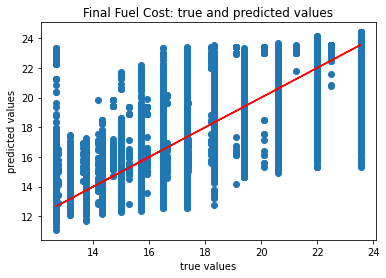

-----Sci-Kit Package Test Set Statistics-----
R-squared of the model is: 0.7478148187224555
Adjusted R-squared of the model is: 0.746924896767625
Mean absolute error of the prediction is: 1.347875296741516
Mean squared error of the prediction is: 3.0975302594836216
Root mean squared error of the prediction is: 1.759980187241783
Mean absolute percentage error of the prediction is: 7.82675548755252


-----SKLearn Package Test Set Statistics-----
R-squared of the model on the training set is: 0.7478148187224555
R-squared of the model on the test set is: 0.7465760162433852
K-Fold R-squared of the model on the training set is: 0.7475934402871663
K-Fold R-squared of the model on the test set is: 0.7486926719173234
Mean absolute error of the prediction is: 1.3504905472461322
Mean squared error of the prediction is: 3.1038505604417805
Root mean squared error of the prediction is: 1.761774832503229
Mean absolute percentage error of the prediction is: 7.827166244030429


------ElasticNet Regular

In [ ]:
X_test = ols_info['predictions_dictionary']['data_dict']['X_test']
y_test = ols_info['predictions_dictionary']['data_dict']['y_test']
iteration_num = len(ols_info['result_archive'])
y_preds = ols_info['result_archive'][ols_info['iterations']-1].predict(X_test)

# graph the results
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Final Fuel Cost: true and predicted values")
plt.show()

# print out the result summary
print("-----Sci-Kit Package Test Set Statistics-----")
print("R-squared of the model is: {}".format(ols_info['predictions_dictionary']['sci_r2_score']))
print("Adjusted R-squared of the model is: {}".format(ols_info['predictions_dictionary']['sci_adj_r2_score']))
print("Mean absolute error of the prediction is: {}".format(ols_info['predictions_dictionary']['sci_mae']))
print("Mean squared error of the prediction is: {}".format(ols_info['predictions_dictionary']['sci_mse']))
print("Root mean squared error of the prediction is: {}".format(ols_info['predictions_dictionary']['sci_rmse']))
print("Mean absolute percentage error of the prediction is: {}".format(ols_info['predictions_dictionary']['sci_mape']))
print("\n")
print("-----SKLearn Package Test Set Statistics-----")
print("R-squared of the model on the training set is: {}".format(ols_info['predictions_dictionary']['skl_r2_train_score']))
print("R-squared of the model on the test set is: {}".format(ols_info['predictions_dictionary']['skl_r2_test_score']))
print("K-Fold R-squared of the model on the training set is: {}".format(ols_info['predictions_dictionary']['skl_kf_r2_train_score']))
print("K-Fold R-squared of the model on the test set is: {}".format(ols_info['predictions_dictionary']['skl_kf_r2_test_score']))
print("Mean absolute error of the prediction is: {}".format(ols_info['predictions_dictionary']['skl_mae']))
print("Mean squared error of the prediction is: {}".format(ols_info['predictions_dictionary']['skl_mse']))
print("Root mean squared error of the prediction is: {}".format(ols_info['predictions_dictionary']['skl_rmse']))
print("Mean absolute percentage error of the prediction is: {}".format(ols_info['predictions_dictionary']['skl_mape']))
print("\n")
print("------{} Regularization Test Set Statistics-----".format(ols_info['predictions_dictionary']['mode']))
print("Selected alpha value for the model test set is: {} ".format(ols_info['predictions_dictionary']['alpha']))
print("K-fold cross validation score for the model is: {} ".format(np.mean(ols_info['predictions_dictionary']['regcv_score']['test_score'])))
print("R-squared of the model on the training set is: {}".format(ols_info['predictions_dictionary']['reg_r2_train_score']))
print("R-squared of the model on the test set is: {}".format(ols_info['predictions_dictionary']['reg_r2_test_score']))
print("Mean absolute error of the prediction is: {}".format(ols_info['predictions_dictionary']['reg_mae']))
print("Mean squared error of the prediction is: {}".format(ols_info['predictions_dictionary']['reg_mse']))
print("Root mean squared error of the prediction is: {}".format(ols_info['predictions_dictionary']['reg_rmse']))
print("Mean absolute percentage error of the prediction is: {}".format(ols_info['predictions_dictionary']['reg_mape']))

#OLS Linear Regression Results and Predictions

![](https://drive.google.com/uc?export=view&id=1JEFrevRF4y-qqZjqSSly7-TRRnGHmlc3)

#OLS Regression Prediction Reliability

![](https://drive.google.com/uc?export=view&id=1-vffR_vkTEDtL-r8YkdNXE80XhsfBJ3E)

The coefficients of the model are all correlated with the target variable based on the manner of feature selection. All continuous variables are at least 65% correlated with the target, and all of the categorical variables have a minimum of 65% of their sublevels that are significantly correlated with the target. 


In addition, none of the selected continuous features are more than 40% correlated with one another (low multicollinearity)

In [ ]:
errors = y_test - y_preds
errors.mean()

2.650672137680782e-15

The average of the error terms is close to zero because we included a constant term in our model.

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_preds, errors)
lev_stats = levene(y_preds, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 5025.62 and p value is 0
Levene test statistic value is 3764.98 and p value is 0


The distribution of error terms in NOT homeoscedastic for all of the predicted values. Therefore the confidence interval for predicted variables may be unreliable. 

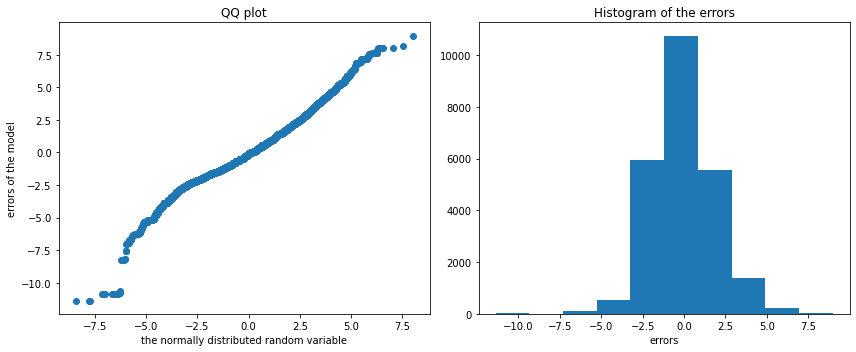

In [ ]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

The model errors are reasonably normally distributed and not correlated with one another

#Data Normalization

Normalize the data for use in the KNN, SVM, and Random Forest algorithms.

In [ ]:
from sklearn import preprocessing

cat_encoded_df = full_data_frame.select_dtypes(include=['object', 'category']).copy() # filtered categorical features
cat_encoded_df.dropna(inplace = True)
cat_encoded_df = pd.get_dummies(cat_encoded_df)

con_fuel_df = fuel_df.select_dtypes(include=['float']).copy() # all of the continuous variables
con_fuel_df['Annual Fuel Cost (FT1)'] = fuel_df[tar_var]
cols = con_fuel_df.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(con_fuel_df)
con_normalized_df = pd.DataFrame(np_scaled, columns = cols)
con_normalized_df.dropna(inplace = True)

#norm_encoded_df = pd.merge(con_normalized_df, cat_encoded_df, right_index=True, left_index=True)

# split up the data set between target and features for OLS
X = con_normalized_df.drop([tar_var], axis=1)
y = con_normalized_df[tar_var]

# split up the data into a test and training set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 465)

#KNN Regression

In [ ]:
# Hyperparameter Tuning
parameters = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 25, 30, 35, 40]
    }

knn = neighbors.KNeighborsRegressor()

tic = time.perf_counter()
grid_search = GridSearchCV(estimator=knn, param_grid=parameters)
grid_search.fit(Xtrain, ytrain)
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)

best_neighbors = grid_search.best_estimator_.n_neighbors
best_weights = grid_search.best_estimator_.weights
best_leaf_size = grid_search.best_estimator_.leaf_size

print("Best Accuracy: %.3f%%" %  (grid_search.best_score_*100.0))
print("Best n_neighbors: {} \nBest weights: {} \nBest leaf_size: {} ".format(best_neighbors, best_weights, best_leaf_size))
print("The KNN Regression Algorithm Hyperparameter Tuning completed in {} minutes and {} seconds".format(mins, secs))

Best Accuracy: 99.963%
Best n_neighbors: 5 
Best weights: distance 
Best leaf_size: 20 
The KNN Regression Algorithm Hyperparameter Tuning completed in 2 minutes and 59 seconds


In [ ]:
best_knn = KNeighborsRegressor(n_neighbors=best_neighbors, weights=best_weights, leaf_size=best_leaf_size)

best_knn.fit(Xtrain, ytrain)

tic = time.perf_counter()
score = cross_val_score(best_knn, Xtest, ytest, cv=5)
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)

print(score)
print("Mean Accuracy: %0.6f (+/- %0.6f)" % (score.mean(), score.std() * 2))
print("The KNN Algorithm completed in {} minutes and {} seconds".format(mins, secs))

[0.99807528 0.99677725 0.9945071  0.9986958  0.9963469 ]
Mean Accuracy: 0.996880 (+/- 0.002919)
The KNN Algorithm completed in 0 minutes and 0 seconds


#Random Forest Regression

In [ ]:
# Hyperparameter Tuning
parameters = {
    'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5]
    }

regr = RandomForestRegressor()

tic = time.perf_counter()
grid_search = GridSearchCV(estimator=regr, param_grid=parameters)
grid_search.fit(Xtrain, ytrain)
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)

best_estimator = grid_search.best_estimator_.n_estimators
best_depth = grid_search.best_estimator_.max_depth
best_min_leaf_samples = grid_search.best_estimator_.min_samples_leaf

print("Best Accuracy: %.3f%%" %  (grid_search.best_score_*100.0))
print("Best n_estimators: %d \nBest max_depth: %d \nBest min_samples_leaf: %d " %  (best_estimator, best_depth, best_min_leaf_samples))
print("The Random Forest Regression Algorithm Hyperparameter Tuning completed in {} minutes and {} seconds".format(mins, secs))

Best Accuracy: 99.998%
Best n_estimators: 14 
Best max_depth: 8 
Best min_samples_leaf: 1 
The Random Forest Regression Algorithm Hyperparameter Tuning completed in 3 minutes and 44 seconds


In [ ]:
best_regr = RandomForestRegressor(max_depth=best_depth, n_estimators=best_estimator
                                  , min_samples_leaf=best_min_leaf_samples, random_state=0)
best_regr.fit(Xtrain, ytrain)

tic = time.perf_counter()
score = cross_val_score(best_regr, Xtest, ytest, cv=5)
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)
print(score)
print("Mean Accuracy: %0.6f (+/- %0.6f)" % (score.mean(), score.std() * 2))
print("The Random Forest Algorithm completed in {} minutes and {} seconds".format(mins, secs))

[0.99989621 0.99991869 0.99958915 0.99996089 0.99888905]
Mean Accuracy: 0.999651 (+/- 0.000806)
The Random Forest Algorithm completed in 0 minutes and 0 seconds


#Support Vector Machine Regression

In [ ]:
# Hyperparameter Tuning
parameters = {
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [1, 2, 3]
    }

svr = SVR()

tic = time.perf_counter()
grid_search = GridSearchCV(estimator=svr, param_grid=parameters)
grid_search.fit(Xtrain, ytrain)
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)

best_kernel = grid_search.best_estimator_.kernel
best_degree = grid_search.best_estimator_.degree
best_C = grid_search.best_estimator_.C
best_shrinking = grid_search.best_estimator_.shrinking

print("Best Accuracy: %.3f%%" %  (grid_search.best_score_*100.0))
print("Best best_kernel: {} \nBest best_degree: {} \nBest C: {}".format(best_kernel, best_degree, best_C))
print("The KNN Regression Algorithm Hyperparameter Tuning completed in {} minutes and {} seconds".format(mins, secs))

Best Accuracy: 72.482%
Best best_kernel: poly 
Best best_degree: 3 
Best C: 1.0
The KNN Regression Algorithm Hyperparameter Tuning completed in 0 minutes and 12 seconds


In [ ]:
best_svr = SVR(kernel=best_kernel, degree=best_degree, C=best_C)

best_svr.fit(Xtrain, ytrain)

tic = time.perf_counter()
cross_val_score(best_svr, Xtest, ytest, cv=5)
toc = time.perf_counter()
seconds = toc - tic
mins = int(seconds / 60)
secs = int(seconds % 60)
print(score)
print("Mean Accuracy: %0.6f (+/- %0.6f)" % (score.mean(), score.std() * 2))
print("The SVM Algorithm completed in {} minutes and {} seconds".format(mins, secs))

[0.99989621 0.99991869 0.99958915 0.99996089 0.99888905]
Mean Accuracy: 0.999651 (+/- 0.000806)
The SVM Algorithm completed in 0 minutes and 0 seconds


#Summary

I have implemented Linear, Polynomial, KNN, Random Forest and Support Vector Machine Regression in this exercise.

I started out with 80 variables and over 38,000 observations providing information about 133 vehicles between the years of 1984 to 2017. The EPA 'Vehicle Fuel Economy Estimates' is an exhaustive data set which necessitated a robust regression solution with an emphasis on efficacy and efficiency.  I chose to examine 'Annual Consumption in Barrels' as opposed to the 'Annual Fuel Cost' because the former is a float data type as opposed to integer, as well as the fact that the selected target contains a larger population of unique values. The 'Vehicle ID' column was removed because it did not provide any relevant information for the regression model while the 'Engine Descriptor' and 'Model' columns had to be eliminated because they contained too many unique values to be processed efficiently with the resources at my disposal for this analysis. I used a histogram to determine that this target variable exhibited 'nearly normal' characteristics and the appropriate skew for reliable regression results. I used boxplots to demonstrate that the variables in the model contained a lot of outliers which supported the decision to winsorize the data within the model.

I designed the process of feature engineering to automatically transform discrete features as well as float variables with limited unique values into categorical variables according to their z-score distributions in order to improve the efficiency of feature selection. The feature engineering step was also designed to automatically detect duplicate sub category names and replace them with unique labels in order to improve the ability to track the relationships between the final coefficients and the parent categorical features in the model.

Where appropriate I transformed any categorical null values to 'NA' as opposed to removing that data as an indication that such information was relevant to the model although it was not applicable to the specific feature. Any continuous data with null values was removed because it represented less than 1% of the information in that data type.

I created a dashboard for feature selection which allows for the user to control 3 filtration variables. The first variable allows the user to define the miniumum threshold for continuous variable correlation, the second regulates the maximum proportion of allowable multi-collinearity and the last variable determines the percentage of sub categories that must  be significant with respect to the target variable in order for any categorical feature to be accepted into the final model. The feature selection function returns all of the comparison matrices used in the selection process for more granular evaluation and I have included a scatter plot to demonstrate the correlation of any remaining (included) continuous features.

This model takes the selected data and runs recursively, for the sake of simplicity, until all of the 'insignificant' linear and polynomial coefficients have been eliminated. The recursion dashboard allows the user to choose between 3 regularization options (Ridge, Lasso, and ElasticNet), automatically tunes the alpha value hyperparameter of the selection and returns the OLS summary results of every iteration. The function also returns a dictionary that tracks all of the sub feature interactions and outputs a host of useful prediction analysis metrics. The dashboard also allows the user to control the training and test size proportions, the training data randomization constant, maximum recursion iterations and the degree of polynomial regression. The model was designed to execute a recursive operation which can generate coefficients for any degree polynomial in order to facilitate the tracking of all feature relationships for the coefficients in the final prediction equation. While there are no limitations on the computational design of this functionality I was unable to process polynomial regression above second degree due to the limitations of my hardware.

I used normalized continuous data for the KNN, Random Forest and SVM algorithms in order to optimize performance. In addition, the model makes use of the GridSearchCV functionality to optimize hyperparameter tuning, and uses k-fold cross validation to generalize the accuracy of the results. In addition, all of these processes were timed which created an additional basis for performance evaluation.

One area for improvement would be to increase the hardware capability of the machine running this model. This would allow for more extensive hyperparameter tuning and testing of higher order polynomial regression. In addition, if I had more time to increase my domain knowledge I may have identified opportunities to combine features to improve model accuracy.

In conclusion, based on a combination of explanatory power, predictive power and result speed I would choose the KNN Regression algorithm to model this particular data set under the current conditions.